# Projeto 03: Comparação de algoritmos de aprendizagem de máquina para um problema de regressão

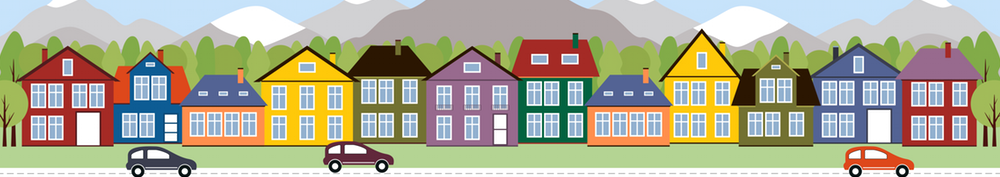

# **Imports**

In [614]:
import pandas as pd, numpy as np, os, re, math, time
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 
import scikitplot as skplt
from sklearn.impute import KNNImputer
import scipy.stats
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import ipywidgets as widgets
import joblib
import _pickle as cPickle

# **Carrregando os dados**

Utilizou-se o dataset  “House Prices - Advanced Regression Techniques”, disponibilizado no Kaggle.

Abaixo o link para Download do Dataset e Dados Completos:

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

# **Metodologia CRISP-DM**

O Cross Industry Standard Process for Data Mining(CRISP-DM) trata-se de um modelo de processo, com seis etapas Shearer (2000), ilustrado na Figura 1. Está sendo amplamente utilizada para ajudar a planejar e desenvolver projetos de ciência de dados.

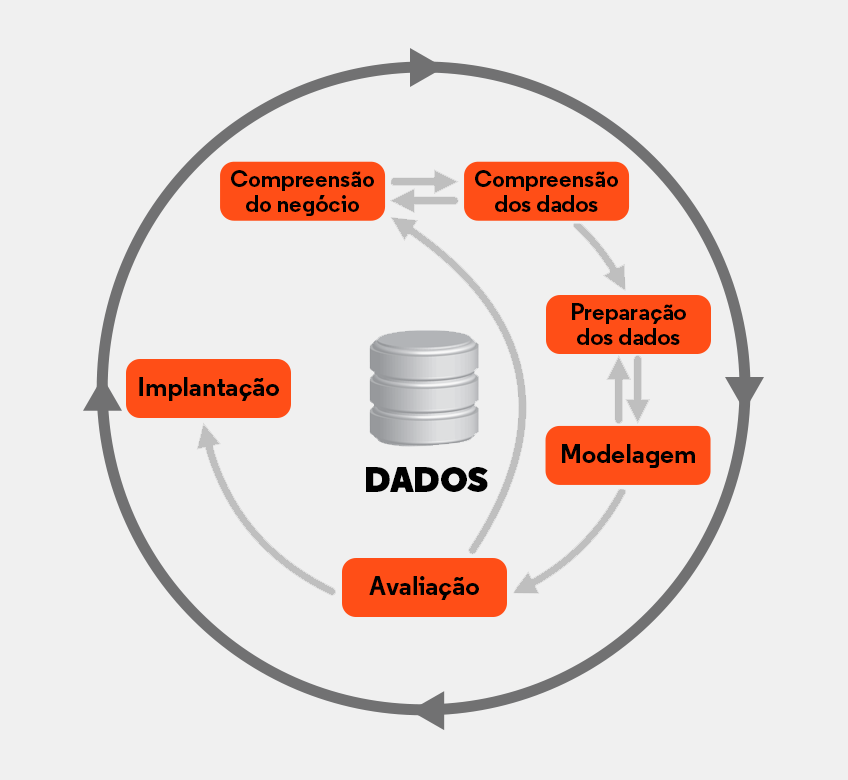
  
  Figura 1: Etapas do Framework CRISP-DM 
  


# **1. Compreensão do Negócio**

### Contextualização do problema de negócio:


### Descrição

Informações extraídas do Kaggle:

Peça a um comprador de casa para descrever a casa dos seus sonhos e provavelmente não começará com a altura do teto do porão ou a proximidade de uma ferrovia leste-oeste. Mas o conjunto de dados desta competição de playground prova que muito mais influencia as negociações de preços do que o número de quartos ou uma cerca branca.

Com 79 variáveis explicativas que descrevem (quase) todos os aspectos das casas residenciais em Ames, Iowa, esta competição desafia você a prever o preço final de cada casa.



### Sobre os dados:
    


        
### Objetivo :
        
Uso de algoritmos de aprendizado de máquina para um problema de previsão do preço de venda de cada casa, visando identificar  qual apresenta o melhor desempenho. A medida de ajuste adotada na comparação de desempenho dos  modelos será o processo de validação cruzada com 10 “folds” para  a métrica Root-Mean-Squared-Error (RMSE) entre o valor previsto e o  preço de venda observado.
                
        
### Proposta de solução:


Implementação e comparação de modelos de aprendizagem de máquina do tipo supervisionado para uma tarefa de regressão em um problema de previsão do preço de venda de cada casa
 


### Estrategia Adotada para solução do problema de negócio:


A Estrategia adotada é criar modelos de aprendizagem de máquina que possa prever o preço de venda de cada casa, para isso a construção do projeto seguiu as etapas do CRISP-DM destacadas abaixo:


* 01. Compreensão dos dados


Já descrita acima.


* 02. Entendimento dos dados

 Analisar o dataset como dimensoes, formatos e dados faltantes. As tarefas realizadas foram: Dimensao dos Dados, Tipo dos Dados nas Colunas, Volume de Dados Faltantes NA's e análise exploratória de dados (EDA) do tipo univariada, bivariada e multivariada.


* 03. Preparação dos Dados

Preparar os dados brutos a fim de adequá-los para etapas de modelagem. As tarefas relizadas foram: Separação dos dados em treinamento e teste, Exclusão de variáveis irrelevantes para o negócio e transformação dos dados, seleção de 


* 04. Modelagem


Implementacao de 3 modelos de Machine Learning utilizando os seguintes algoritmos: Árvore de decisão, Random Forest e XGBoost. Utilização  do processo de validação cruzada com 10 folds e uso da técnica de GridSerch para otimização dos hiperparâmetros


* 05. Avaliação

 
Métrica Root-Mean-Squared-Error (RMSE) entre o  valor previsto e o preço de venda observado


* 06. Implementação

Criação de uma proposta de uso da solução com o modelo que apresentar a melhor performance de acordo com as métricas do item 5.

# **2. Entendimento dos dados**

Esta etapa consiste desde a captura dos dados até a identificação de problemas relacionados à qualidade. Nesta fase é também onde se formam hipóteses em cima do que se aprendeu com os dados.

# 2.1. Importação dos Dados

In [878]:
train_data = pd.read_csv("train.csv",index_col="Id")
test_data = pd.read_csv("test.csv",index_col="Id")
df = train_data
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


# 2.2. Dicionário do Dataset

**SalePrice**:  the property's sale price in dollars. This is the target variable that you're trying to predict.

**MSSubClass**: The building class

**MSZoning**: The general zoning classification

**LotFrontage**: Linear feet of street connected to property

**LotArea**: Lot size in square feet

**Street**: Type of road access

**Alley**: Type of alley access

**LotShape**: General shape of property

**LandContour**: Flatness of the property

**Utilities**: Type of utilities available

**LotConfig**: Lot configuration

**LandSlope**: Slope of property

**Neighborhood**: Physical locations within Ames city limits

**Condition1**: Proximity to main road or railroad

**Condition2**: Proximity to main road or railroad (if a second is present)

**BldgType**: Type of dwelling

**HouseStyle**: Style of dwelling

**OverallQual**: Overall material and finish quality

**OverallCond**: Overall condition rating

**YearBuilt**: Original construction date

**YearRemodAdd**: Remodel date

**RoofStyle**: Type of roof

**RoofMatl**: Roof material

**Exterior1st**: Exterior covering on house

**Exterior2nd**: Exterior covering on house (if more than one material)

**MasVnrType**: Masonry veneer type

**MasVnrArea**: Masonry veneer area in square feet

**ExterQual**: Exterior material quality

**ExterCond**: Present condition of the material on the exterior

**Foundation**: Type of foundation

**BsmtQual**: Height of the basement

**BsmtCond**: General condition of the basement

**BsmtExposure**: Walkout or garden level basement walls

**BsmtFinType1**: Quality of basement finished area

**BsmtFinSF1**: Type 1 finished square feet

**BsmtFinType2**: Quality of second finished area (if present)

**BsmtFinSF2**: Type 2 finished square feet

**BsmtUnfSF**: Unfinished square feet of basement area

**TotalBsmtSF**: Total square feet of basement area

**Heating**: Type of heating

**HeatingQC**: Heating quality and condition

**CentralAir**: Central air conditioning

**Electrical**: Electrical system

**1stFlrSF**: First Floor square feet

**2ndFlrSF**: Second floor square feet

**LowQualFinSF**: Low quality finished square feet (all floors)

**GrLivArea**: Above grade (ground) living area square feet

**BsmtFullBath**: Basement full bathrooms

**BsmtHalfBath**: Basement half bathrooms

**FullBath**: Full bathrooms above grade

**HalfBath**: Half baths above grade

**Bedroom**: Number of bedrooms above basement level

**Kitchen**: Number of kitchens

**KitchenQual**: Kitchen quality

**TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)

**Functional**: Home functionality rating

**Fireplaces**: Number of fireplaces

**FireplaceQu**: Fireplace quality

**GarageType**: Garage location

**GarageYrBlt**: Year garage was built

**GarageFinish**: Interior finish of the garage

**GarageCars**: Size of garage in car capacity

**GarageArea**: Size of garage in square feet

**GarageQual**: Garage quality

**GarageCond**: Garage condition

**PavedDrive**: Paved driveway

**WoodDeckSF**: Wood deck area in square feet

**OpenPorchSF**: Open porch area in square feet

**EnclosedPorch**: Enclosed porch area in square feet

**3SsnPorch**: Three season porch area in square feet

**ScreenPorch**: Screen porch area in square feet

**PoolArea**: Pool area in square feet

**PoolQC**: Pool quality

**Fence**: Fence quality

**MiscFeature**: Miscellaneous feature not covered in other categories

**MiscVal**: $Value of miscellaneous feature

**MoSold**: Month Sold

**YrSold**: Year Sold

**SaleType**: Type of sale

**SaleCondition**: Condition of sale


# 2.3. Dimensão dos dados

In [710]:
print( 'Número de instâncias do dataset : {}'.format( df.shape[0] ) )
print( 'Número de atributos do dataset: {}'.format( df.shape[1] ) )

Número de instâncias do dataset : 1460
Número de atributos do dataset: 80


# 2.3.1. Check dados duplicados

In [711]:
# drop duplicates
df.duplicated().sum()

0

### Análise e Insights

 - Não foram encontradas instâncias duplicadas no dataset

# 2.4. Análise Exploratória de dados (EDA) - Visão geral do dataset

O objetivo deste etapa é fazer dois tipos de explorações sob os dados:


* Enriquecer o conjunto de dados (dataset) com o levantamento de metadados como dimensão, tipos de atributos e medidas de resumo;

* Explorar analiticamente o dataset com o uso de estatística descritiva (medida de tendência central, variabilidade) e métodos gráficos para se ter ideias de tipos de análises que podem ser realizadas. Como aqui se trata da primeira exploração de dados, a seguir serão definidas algumas propostas de análises com a finalidade de tornar os estudos mais bem direcionados.

# 2.4.1.Identificar o tipo e natureza de cada variável

Dentre os tipos de variáveis que podemos encontrar ao tratar os dados, existem as numéricas, ou quantitativas (por exemplo: peso, comprimento, temperatura), e as categóricas, ou qualitativas (por exemplo: gênero, nacionalidade) conforme apresentado na figura 2.

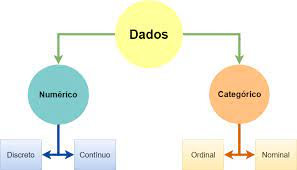

  
  Figura 2: Tipo e Natureza de um atributo/Variável 
  


In [712]:
pd.DataFrame.info(df);

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### Análise e Insights

- A base de dados contém 80 variáveis e 1.460 instâncias


- A base de treino possui: 

    - 37 variáveis em formato numérico (float64: 3, int64:34)
    - 43 variáveis em formato categórico (object: 43)
    
    
 - Nas próximas etapas será analisado a necessidade de ajuste no formato das variáveis (data type)

# 2.4.2. Data type

In [ ]:
#De acordo com informações do dataset, é uma variável categórica
df['MSSubClass'] = df['MSSubClass'].astype(str)

# 2.4.3. Identificando a variável target (alvo) do problema de negócio

O objetivo do estudo é prever o preço das casas, ou seja, a variável resposta é numérica, logo, trata-se de um problema de regressão para uma tarefa supervisionada, pois temos a variável resposta no dataset.

De acordo com a descrição do dataset e das informações da plataforma Kaggle , a variável 'SalePrice' é a variável resposta

In [714]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\jam06\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribuição da variável resposta - SalePrice')

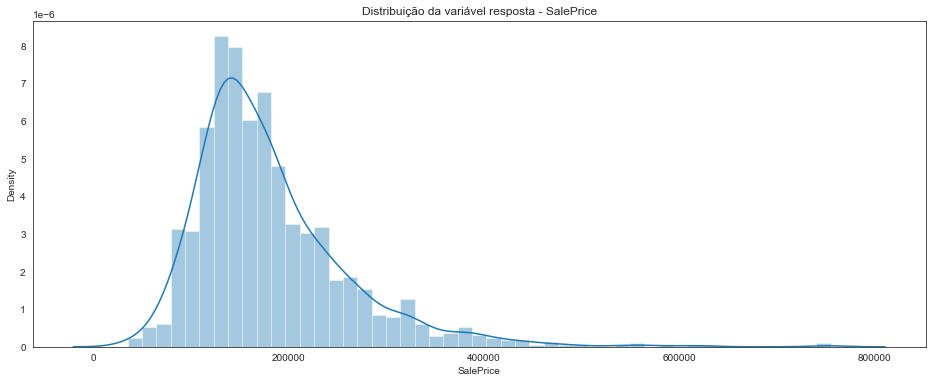

In [622]:
plt.figure(figsize=(16,6))
sns.distplot(df['SalePrice']);
plt.title('Distribuição da variável resposta - SalePrice')

<AxesSubplot:title={'center':'House Sale Price'}, xlabel='SalePrice'>

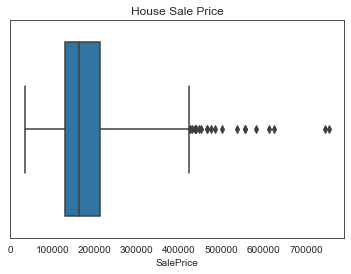

In [623]:
plt.title("House Sale Price")
sns.boxplot(data=df, x="SalePrice", whis=2.5, fliersize=5)

### Análise e Insights:


- De acordo com as principais medidas de estatística descritiva , os preços de vendas das propriedades variam de 34.900 até 755.000 mil doláres, sendo o valor médio das casas de 180.921, com desvio padrão de 79.415 e mediana de 163.000.


- Foi possível observar pelo gráfico de boxplot, valores discrepantes (outliers), ou seja, algumas propriedades possuem preços muito elevados.


# 2.4.4. Exploração dos dados (medidas descritivas, distribuição das variáveis)

# 2.4.4.1. Separando variáveis categóricas de numéricas

In [624]:
cat_attributes = df.select_dtypes( include=['object'] )
num_attributes = df.select_dtypes( exclude=['object'] )
num_attributes_2 = df.drop('SalePrice',axis = 1)

## 2.4.4.1. Análise Exploratória de Dados (EDA) - Variáveis Numéricas 

In [625]:
num_attributes.describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0


In [626]:
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T 
d2 = pd.DataFrame( num_attributes.apply( min ) ).T 
d3 = pd.DataFrame( num_attributes.apply( max ) ).T 
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T 
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T 
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T 

# concatenar
m = pd.concat( [ d4, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes','range', 'std', 'Assiimetria', 'Curtose']
m

,attributes,range,std,Assiimetria,Curtose
0,LotFrontage,292.0,24.274639,2.163569,17.452867
1,LotArea,213945.0,9977.846105,12.207688,203.243271
2,OverallQual,9.0,1.382523,0.216944,0.096293
3,OverallCond,8.0,1.112418,0.693067,1.106413
4,YearBuilt,138.0,30.192559,-0.613461,-0.439552
5,YearRemodAdd,60.0,20.638335,-0.503562,-1.272245
6,MasVnrArea,1600.0,181.003845,2.669084,10.082417
7,BsmtFinSF1,5644.0,455.941866,1.685503,11.118236
8,BsmtFinSF2,1474.0,161.264017,4.255261,20.113338
9,BsmtUnfSF,2336.0,441.715605,0.920268,0.474994


# 2.4.4.1.1.Distribuições das variáveis Numéricas

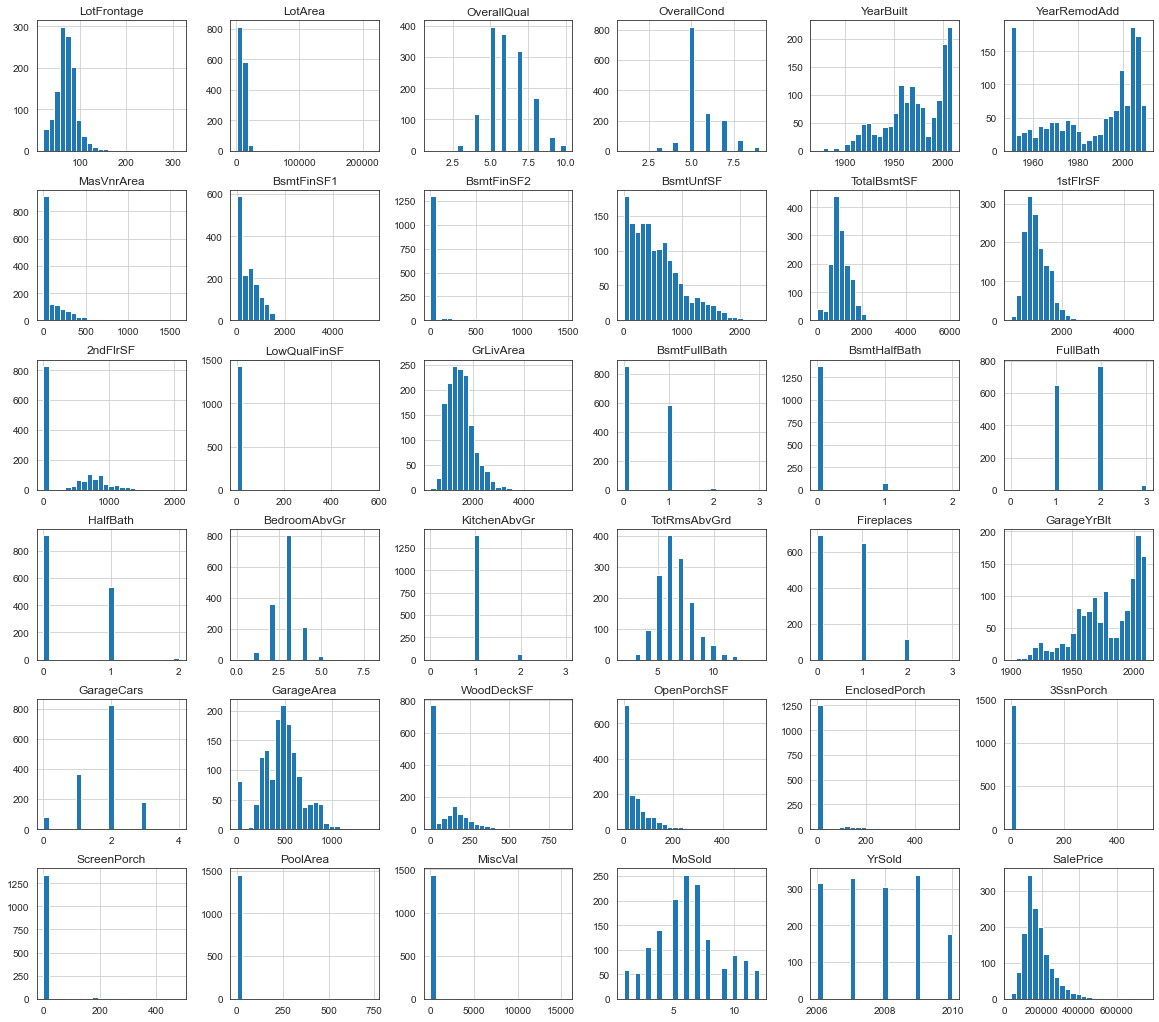

In [627]:
num_attributes.hist(bins=25, figsize=(20,18));

C:\Users\jam06\AppData\Local\Temp\ipykernel_47000\464035333.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=90)
C:\Users\jam06\AppData\Local\Temp\ipykernel_47000\464035333.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=90)
C:\Users\jam06\AppData\Local\Temp\ipykernel_47000\464035333.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=90)
C:\Users\jam06\AppData\Local\Temp\ipykernel_47000\464035333.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=90)
C:\Users\jam06\AppData\Local\Temp\ipykernel_47000\464035333.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2,0

<AxesSubplot:xlabel='YearRemodAdd'>

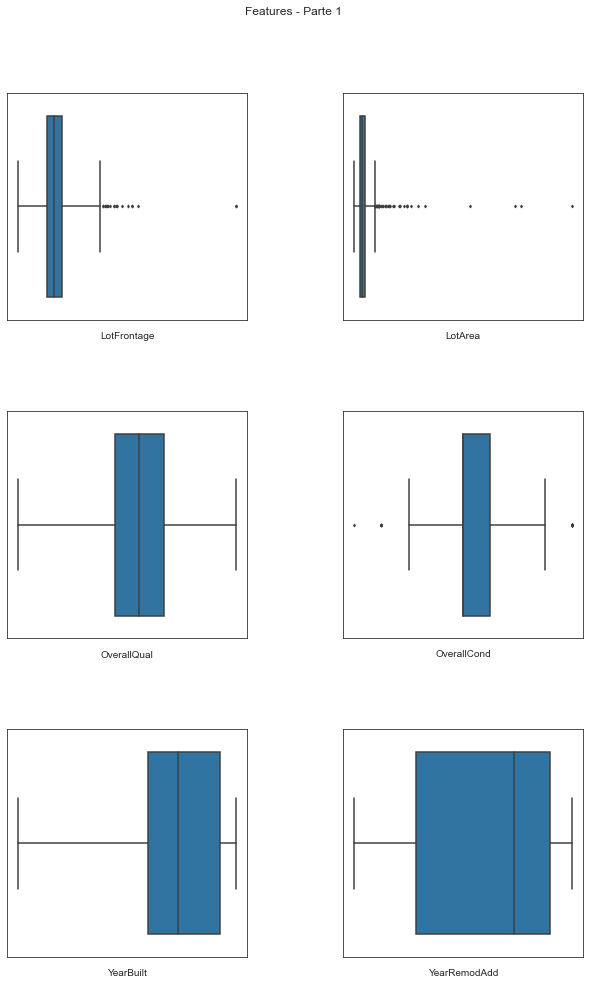

In [628]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))  

plt.subplots_adjust(left=0.1,    
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

fig.suptitle('Features - Parte 1 ')
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=90)
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=90)
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=90)
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=90)
axes[2,0].set_xticklabels(axes[1,1].get_xticklabels(), rotation=90)
axes[2,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[0, 0], data=num_attribute, x="LotFrontage", whis=2.5, fliersize=2)
sns.boxplot(ax=axes[0, 1], data=num_attribute, x="LotArea", whis=2.5, fliersize=2)
sns.boxplot(ax=axes[1, 0], data=num_attribute, x="OverallQual", whis=2.5, fliersize=2)
sns.boxplot(ax=axes[1, 1], data=num_attribute, x="OverallCond", whis=2.5, fliersize=2)
sns.boxplot(ax=axes[2, 0], data=num_attribute, x="YearBuilt", whis=2.5, fliersize=2)
sns.boxplot(ax=axes[2, 1], data=num_attribute, x="YearRemodAdd", whis=2.5, fliersize=2)

### Análises e Insights

#### Variáveis numéricas - Parte 1



- LotFrontage refere- aos pés lineares de rua conectados à propriedade. É uma variável quantitativa discreta, com range variando de 21 até 313. Apresenta assimetria à direita e de acordo com o boxplot, apresentou outliers, ou seja, observações discrepantes. Essa variável possui **missing**, o que deverá ser analisado na etapa de pré-processamento como essa informação deve ser tratada.


- A variável LotArea diz respeito ao tamanho do imóvel, é uma variável quantitativa contínua. O tamanho dos imóveis variam de 1300 até 215.245 metros quadrados. Apresenta assimetria à direita e de acordo com o boxplot, apresentou outliers, ou seja, observações discrepantes, que nesse caso, são de valores de imóveis muito elevados.


- OverallQua diz respeito ao material geral e qualidade de acabamento, que provavelmente trate-se de um nota, variando de 1 até 10. A média é de 6. Apresenta assimetria à direita e de acordo com o boxplot, não apresentou outliers.É uma variável quantitativa discreta


- OverallCond diz respeito à avalidação geral da condição do imóvel , que provavelmente trate-se de um nota, variando de 1 até 9. A média é de 5,47. Apresenta assimetria à direita e de acordo com o boxplot, apresentou outliers.É uma variável quantitativa discreta


- YearBuilt é uma variável discreta que contém a data de construção do imóvel. O imóvel mais antigo é de 1872 e o mais novo é de 2010. Os imóveis do portfólio tem média de data de contrução da década de 70. Apresenta assimetria à esquerda e de acordo com o boxplot, não apresentou outliers.


- YearRemodAdd, é uma variável quantitativa discreta e refere-se a data de remodelação do imóvel. A data do imóvel mais antigo remodelado é de 1950 e o mais recente é de 2010. Não apresenta outliers de acordo com o boxplot.


C:\Users\jam06\AppData\Local\Temp\ipykernel_47000\3697709272.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=90)
C:\Users\jam06\AppData\Local\Temp\ipykernel_47000\3697709272.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=90)
C:\Users\jam06\AppData\Local\Temp\ipykernel_47000\3697709272.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=90)
C:\Users\jam06\AppData\Local\Temp\ipykernel_47000\3697709272.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=90)
C:\Users\jam06\AppData\Local\Temp\ipykernel_47000\3697709272.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe

<AxesSubplot:xlabel='1stFlrSF'>

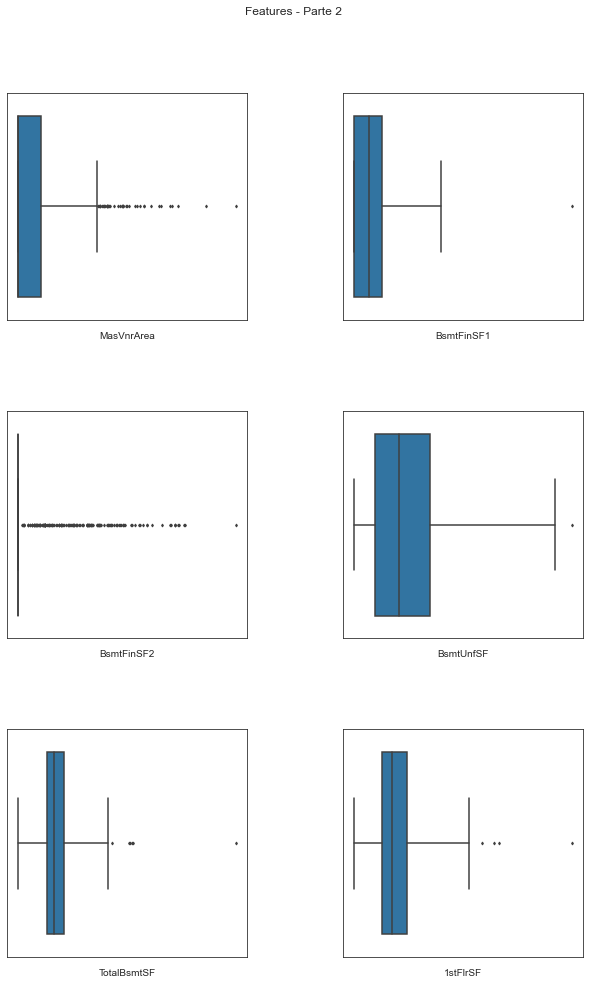

In [629]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))  

plt.subplots_adjust(left=0.1,    
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

fig.suptitle('Features - Parte 2 ')
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=90)
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=90)
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=90)
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=90)
axes[2,0].set_xticklabels(axes[1,1].get_xticklabels(), rotation=90)
axes[2,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[0, 0], data=num_attribute, x="MasVnrArea", whis=2.5, fliersize=2)
sns.boxplot(ax=axes[0, 1], data=num_attribute, x="BsmtFinSF1", whis=2.5, fliersize=2)
sns.boxplot(ax=axes[1, 0], data=num_attribute, x="BsmtFinSF2", whis=2.5, fliersize=2)
sns.boxplot(ax=axes[1, 1], data=num_attribute, x="BsmtUnfSF", whis=2.5, fliersize=2)
sns.boxplot(ax=axes[2, 0], data=num_attribute, x="TotalBsmtSF", whis=2.5, fliersize=2)
sns.boxplot(ax=axes[2, 1], data=num_attribute, x="1stFlrSF", whis=2.5, fliersize=2)

### Análises e Insights

#### Variáveis numéricas - Parte 2


- MasVnrArea é uma variável quantitativa contínua, e refere-se a área de folheado de alvenaria em metros quadrados. Existem casas sem área folheado de alvenaria e imóveis com até 1600.0 metros quadrados. Essa variável possui **missing**, o que deverá ser analisado na etapa de pré-processamento como essa informação deve ser tratada. Apresenta assimetria à direita e de acordo com o boxplot, apresentou outliers, ou seja, observações discrepantes.


- BsmtFinSF1 é uma variável quantitativa contínua, que diz repeito ao Tipo 1 pés quadrados acabados.Existem casas sem Tipo 1 pés quadrados acabados  e imóveis com até 5644. Apresenta assimetria à direita e de acordo com o boxplot, apresentou 1 outlier.


- BsmtFinSF2 é uma variável quantitativa contínua, que diz repeito ao  Tipo 2 metros quadrados acabados. Apresenta assimetria à direita e de acordo com o boxplot, apresentou muitos outlier. 75% dos imóveis não possuem Tipo 2 metros quadrados acabados.

- BsmtUnfSF é uma variável quantitativa contínua, refere-se aos metros quadrados inacabados da área do porão. Apresenta assimetria à direita e de acordo com o boxplot, apresentou 1 outlier.


- TotalBsmtSF é uma variável quantitativa contínua, que diz respeito aos metros quadrados totais da área do porão. Existem imóveis que não possuem porão até casas com mais de 6100 metros quadrados. Apresenta assimetria à direita e de acordo com o boxplot possuem outliers.


- 1stFlrSF, é uma variável quantitativa contínua e refere-se aos pés quadrados do primeiro andar. O range varia de 334 até 4692. Apresenta assimetria à direita e de acordo com o boxplot, apresentou 4 outlier.


C:\Users\jam06\AppData\Local\Temp\ipykernel_47000\1660171700.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=90)
C:\Users\jam06\AppData\Local\Temp\ipykernel_47000\1660171700.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=90)
C:\Users\jam06\AppData\Local\Temp\ipykernel_47000\1660171700.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=90)
C:\Users\jam06\AppData\Local\Temp\ipykernel_47000\1660171700.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=90)
C:\Users\jam06\AppData\Local\Temp\ipykernel_47000\1660171700.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe

<AxesSubplot:xlabel='FullBath'>

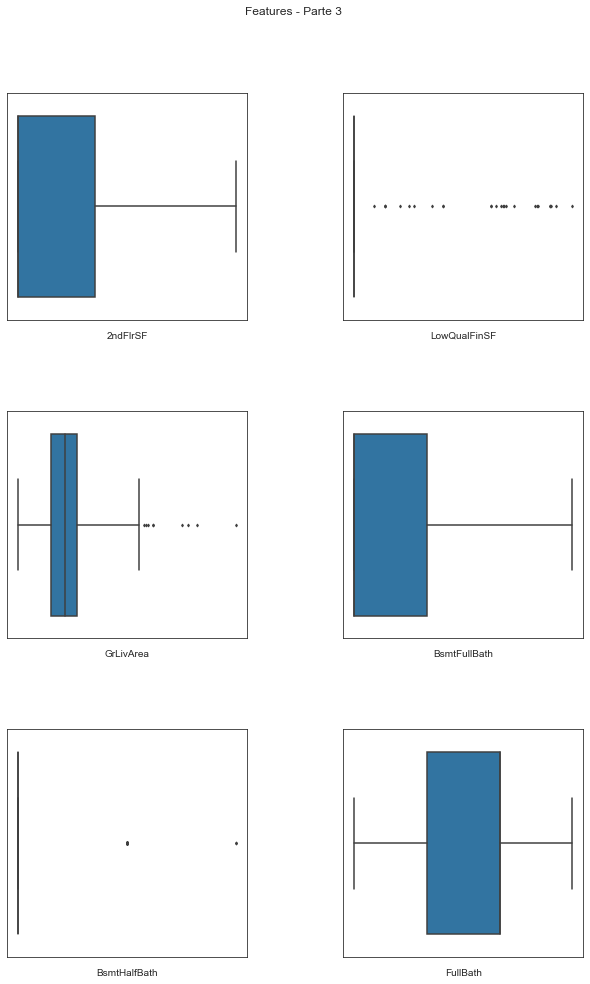

In [630]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))  

plt.subplots_adjust(left=0.1,    
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

fig.suptitle('Features - Parte 3 ')
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=90)
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=90)
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=90)
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=90)
axes[2,0].set_xticklabels(axes[1,1].get_xticklabels(), rotation=90)
axes[2,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[0, 0], data=num_attribute, x="2ndFlrSF", whis=2.5, fliersize=2)
sns.boxplot(ax=axes[0, 1], data=num_attribute, x="LowQualFinSF", whis=2.5, fliersize=2)
sns.boxplot(ax=axes[1, 0], data=num_attribute, x="GrLivArea", whis=2.5, fliersize=2)
sns.boxplot(ax=axes[1, 1], data=num_attribute, x="BsmtFullBath", whis=2.5, fliersize=2)
sns.boxplot(ax=axes[2, 0], data=num_attribute, x="BsmtHalfBath", whis=2.5, fliersize=2)
sns.boxplot(ax=axes[2, 1], data=num_attribute, x="FullBath", whis=2.5, fliersize=2)

### Análises e Insights

#### Variáveis numéricas - Parte 3


 
- 2stFlrSF, é uma variável quantitativa contínua e refere-se aos pés quadrados do segundo andar. Existem casas sem pés quadrados do segundo andar  e imóveis com até 2065. 50% dos imóveis não pés quadrados no segundo andar. Apresenta assimetria à direita e de acordo com o boxplot, apresentou 4 outlier.

- LowQualFinSF, é uma variável quantitativa contínua e refere-se aos Pés quadrados acabados de baixa qualidade (todos os andares).Apresenta assimetria à direita e de acordo com o boxplot, apresenta muitos outliers em ambos os extremos. Até 75% não possuem pés quadrados acabados de baixa qualidade (todos os andares).


- GrLivArea é uma variável quantitativa contínua, que diz repeito a área habitável acima do solo (pés quadrados). O range varia de 334 até 5642. Apresenta assimetria à direita e de acordo com o boxplot, apresenta outliers no extremo superior.


- BsmtFullBath é uma variável quantitativa discreta, que diz repeito ao número de banheiros completos do porão. Existem imóveis sem banheiros completos no porão até imóveis com 3. Até 50% dos imóveis não possuem banheiros completos no porão. Não possuem outliers.


- BsmtHalfBath é uma variável quantitativa discreta, que diz respeito ao número de banheiros em construção no porão.Existem imóveis sem banheiros em construção no porão até imóveis com 2. Até 75% dos imóveis não possuem banheiros em construção no porão. De acordo com o boxplot, possuem 2 observações com outliers.
 
- FullBath, é uma variável quantitativa discreta e refere-se ao número de banheiros completos acima do nível. Existem imóveis sem banheiros e com no máximo 3. Não foram identificados outliers.

C:\Users\jam06\AppData\Local\Temp\ipykernel_47000\4019879196.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=90)
C:\Users\jam06\AppData\Local\Temp\ipykernel_47000\4019879196.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=90)
C:\Users\jam06\AppData\Local\Temp\ipykernel_47000\4019879196.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=90)
C:\Users\jam06\AppData\Local\Temp\ipykernel_47000\4019879196.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=90)
C:\Users\jam06\AppData\Local\Temp\ipykernel_47000\4019879196.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe

ValueError: Could not interpret input 'Fireplace'

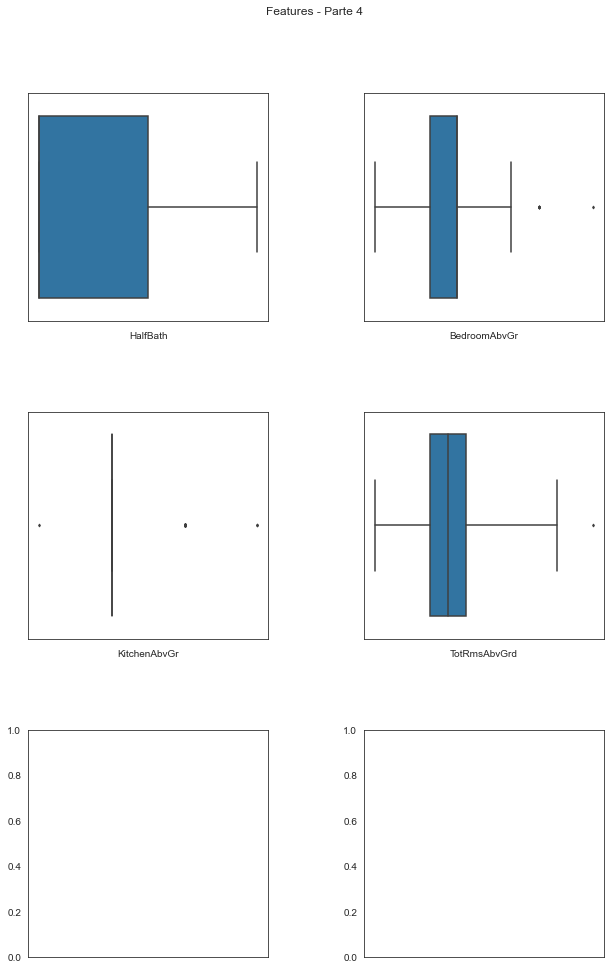

In [631]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))  

plt.subplots_adjust(left=0.1,    
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

fig.suptitle('Features - Parte 4 ')
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=90)
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=90)
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=90)
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=90)
axes[2,0].set_xticklabels(axes[1,1].get_xticklabels(), rotation=90)
axes[2,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[0, 0], data=num_attribute, x="HalfBath", whis=2.5, fliersize=2)
sns.boxplot(ax=axes[0, 1], data=num_attribute, x="BedroomAbvGr", whis=2.5, fliersize=2)
sns.boxplot(ax=axes[1, 0], data=num_attribute, x="KitchenAbvGr", whis=2.5, fliersize=2)
sns.boxplot(ax=axes[1, 1], data=num_attribute, x="TotRmsAbvGrd", whis=2.5, fliersize=2)
sns.boxplot(ax=axes[2, 0], data=num_attribute, x="Fireplace", whis=2.5, fliersize=2)
sns.boxplot(ax=axes[2, 1], data=num_attribute, x="GarageYrBlt", whis=2.5, fliersize=2)

### Análises e Insights

#### Variáveis numéricas - Parte 4


- HalfBath, é uma variável quantitativa discreta e refere-se ao número de banheiros em construção acima do nível. Existem imóveis sem banheiros em construção e com no máximo 2. Não foram identificados outliers.


- BedroomAbvGr, é uma variável quantitativa discreta e refere-se ao número de quartos acima do subsolo. Existem imóveis sem quartos e até imóveis com 8. Foram identifiacados 2 outliers.


- KitchenAbvGr, é uma variável quantitativa discreta. Existem imóveis sem cozinha e até imóveis com 3. Foram identifiacados 3 outliers.


- TotRmsAbvGrd, é uma variável quantitativa discreta e diz respeito ao total de quartos acima do nível (não inclui banheiros). Existem imóveis com somente 2 quartos e até imóveis com 14. De acordo com o boxplot, identifiado apenas 1 outliers.


- Fireplaces, é uma variável quantitativa discreta e refere-se ao número de lareiras no imóvel.Existem imóveis sem lareira e até imóveis com 3. De acordo com o boxplot, não identifiado outliers.


- GarageYrBlt, é uma variável quantitativa discreta e refere-se ao ano em que a garagem foi construída. A data da garagem mais antiga construída foi no ano de 1900 e a garagem mais recente é de 2010.Essa variável possui **missing**, o que deverá ser analisado na etapa de pré-processamento como essa informação deve ser tratada. Nota-se também um aumento ao longo dos anos no número de garagens construídas nos últimos anos.



C:\Users\jam06\AppData\Local\Temp\ipykernel_47000\2059142269.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=90)
C:\Users\jam06\AppData\Local\Temp\ipykernel_47000\2059142269.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=90)
C:\Users\jam06\AppData\Local\Temp\ipykernel_47000\2059142269.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=90)
C:\Users\jam06\AppData\Local\Temp\ipykernel_47000\2059142269.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=90)
C:\Users\jam06\AppData\Local\Temp\ipykernel_47000\2059142269.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe

<AxesSubplot:xlabel='3SsnPorch'>

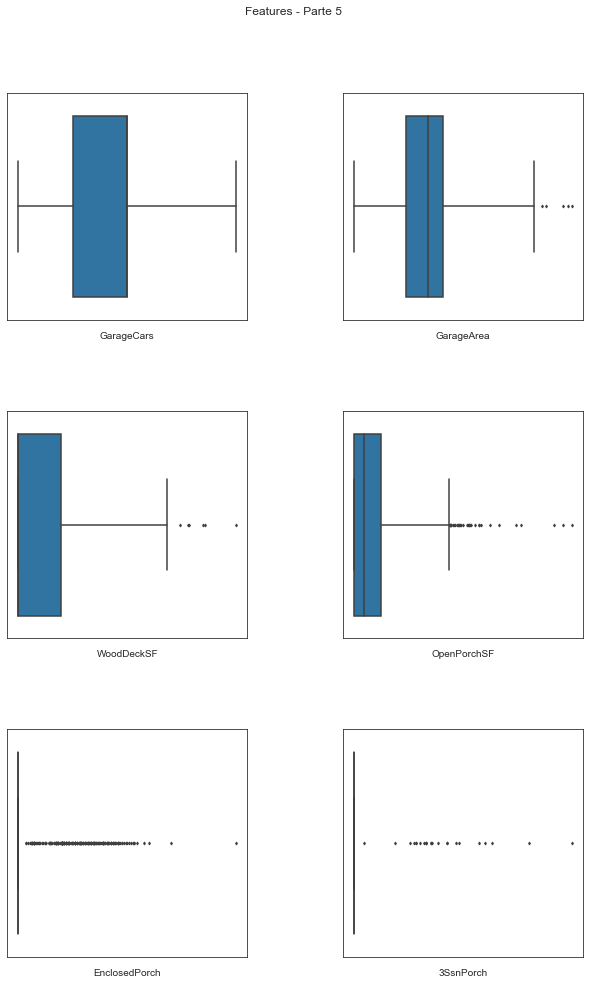

In [632]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))  

plt.subplots_adjust(left=0.1,    
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

fig.suptitle('Features - Parte 5 ')
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=90)
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=90)
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=90)
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=90)
axes[2,0].set_xticklabels(axes[1,1].get_xticklabels(), rotation=90)
axes[2,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[0, 0], data=num_attribute, x="GarageCars", whis=2.5, fliersize=2)
sns.boxplot(ax=axes[0, 1], data=num_attribute, x="GarageArea", whis=2.5, fliersize=2)
sns.boxplot(ax=axes[1, 0], data=num_attribute, x="WoodDeckSF", whis=2.5, fliersize=2)
sns.boxplot(ax=axes[1, 1], data=num_attribute, x="OpenPorchSF", whis=2.5, fliersize=2)
sns.boxplot(ax=axes[2, 0], data=num_attribute, x="EnclosedPorch", whis=2.5, fliersize=2)
sns.boxplot(ax=axes[2, 1], data=num_attribute, x="3SsnPorch", whis=2.5, fliersize=2)

### Análises e Insights

#### Variáveis numéricas - Parte 5


- GarageCars, é uma variável quantitativa discreta e refere-se ao tamanho da garagem em capacidade de carro.Existem imóveis sem garagem e até com no máximo de 4.


- GarageArea, é uma variável quantitativa contínua e refere-se ao tamanho da garagem em metros quadrados.Existem imóveis sem garagem e até com no máximo de 1480 metros quadrados. Variável apresenta dados discrepantes de acordo com o boxplot.


- WoodDeckS, é uma variável quantitativa contínua e refere-se a àrea do deck de madeira em metros quadrados. Existem imóveis sem área de deck e imóveis com até 857 metros quadrados. Variável apresenta dados discrepantes de acordo com o boxplot.


- OpenPorchSF, é uma variável quantitativa contínua e refere-se a àrea de varanda aberta em metros quadrados.Existem imóveis sem área de varanda aberta e imóveis com até 547 metros quadrados. Variável apresenta dados discrepantes de acordo com o boxplot.
	

- EnclosedPorch, é uma variável quantitativa contínua e refere-se a àrea de varanda fechada em metros quadrados.Existem imóveis sem área de varanda fechada e imóveis com até 552 metros quadrados. Variável apresenta muitos dados discrepantes de acordo com o boxplot.

- 3SsnPorch, é uma variável quantitativa contínua e refere-se a área de varanda de três estações em pés quadrados. Existem imóveis sem área de varanda de três estações e imóveis com até 508 metros quadrados. Variável apresenta dados discrepantes de acordo com o boxplot.


C:\Users\jam06\AppData\Local\Temp\ipykernel_47000\2397877036.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=90)
C:\Users\jam06\AppData\Local\Temp\ipykernel_47000\2397877036.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=90)
C:\Users\jam06\AppData\Local\Temp\ipykernel_47000\2397877036.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=90)
C:\Users\jam06\AppData\Local\Temp\ipykernel_47000\2397877036.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=90)
C:\Users\jam06\AppData\Local\Temp\ipykernel_47000\2397877036.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe

<AxesSubplot:xlabel='YrSold'>

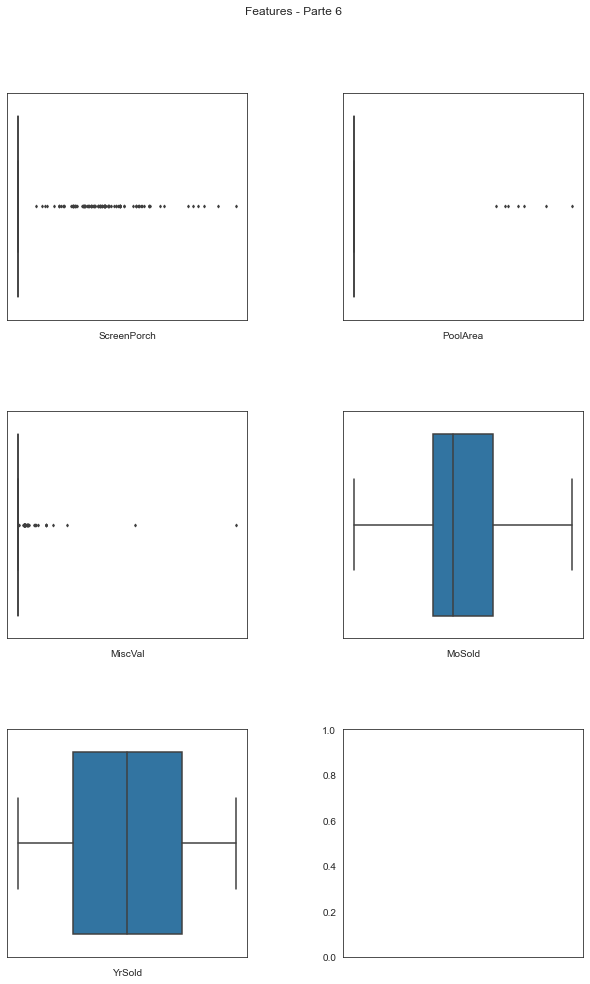

In [563]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))  

plt.subplots_adjust(left=0.1,    
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

fig.suptitle('Features - Parte 6 ')
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=90)
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=90)
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=90)
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=90)
axes[2,0].set_xticklabels(axes[1,1].get_xticklabels(), rotation=90)
axes[2,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[0, 0], data=num_attribute, x="ScreenPorch", whis=2.5, fliersize=2)
sns.boxplot(ax=axes[0, 1], data=num_attribute, x="PoolArea", whis=2.5, fliersize=2)
sns.boxplot(ax=axes[1, 0], data=num_attribute, x="MiscVal", whis=2.5, fliersize=2)
sns.boxplot(ax=axes[1, 1], data=num_attribute, x="MoSold", whis=2.5, fliersize=2)
sns.boxplot(ax=axes[2, 0], data=num_attribute, x="YrSold", whis=2.5, fliersize=2)


### Análises e Insights

#### Variáveis numéricas - Parte 6


- ScreenPorch, é uma variável quantitativa contínua e refere-se a àrea da varanda com tela em metros quadrados. Existem imóveis sem área de varanda com tela e imóveis com até 480 metros quadrados. Variável apresenta dados discrepantes de acordo com o boxplot.


- PoolArea, é uma variável quantitativa contínua e refere-se a àrea da piscina em metros quadrados. Existem imóveis sem área de piscina e imóveis com até 738 metros quadrados. Variável apresenta dados discrepantes de acordo com o boxplot.


- MiscVal, é uma variável quantitativa contínua e refere-se ao valor do recurso diverso. Existem imóveis sem valor de recurso diversos e imóveis com até 15500. Variável apresenta dados discrepantes de acordo com o boxplot.


- MoSold, é uma variável quantitativa discreta e refere-se aos meses de idade da venda do imóvel.Existem imóveis com meses de idade de 1 até no máximo 12. Variável não possui dados discrepantes de acordo com o boxplot.


- YrSold, é uma variável quantitativa discreta e refere-se ao tempo em anos da venda do imóvel.Existem imóveis desde 2006 até 2010.Variável não possui dados discrepantes de acordo com o boxplot.

# 2.4.5. Matriz de correlação

A presença de um elevado grau de correlação entre as variáveis explicativas pode introduzir uma série de inconvenientes em modelos de predição, como o problema de multicolinearidade (SÍCSU, 2010). Outro fator importante em analisar o grau de correlação entre as variáveis independentes é possibilitar a redução de dimensionalidade, tornando o modelo mais simples, permitindo escolher uma entre elas.

Assim, a análise de correlação é uma abordagem do tipo “filter”, e o seu coeficiente varia de -1 a 1. Quanto mais próximo de 1, existe uma forte correlação positiva. Quanto mais próximo de -1, existe uma forte correlação negativa. Por fim, coeficientes próximos de zero, significam que não há correlação linear. O tipo de correlação que será utilizada é a de person, pois todas asa variáveis são numéricas.

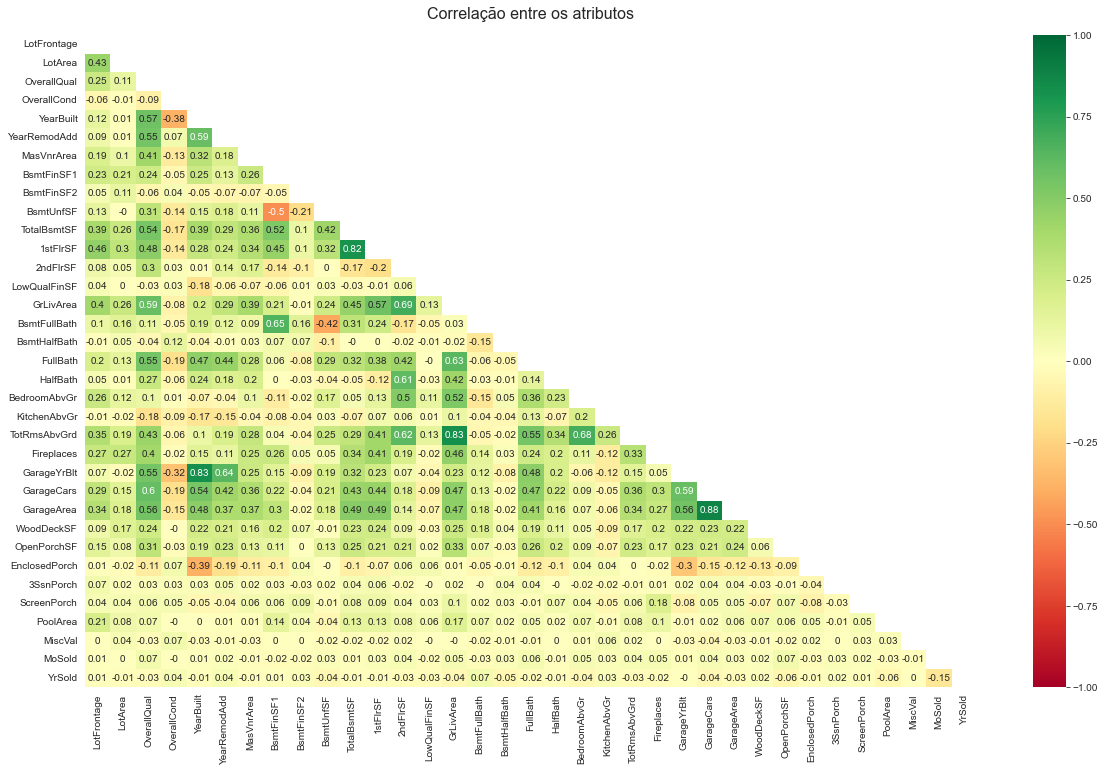

In [564]:
#Criando uma matriz de correlação
plt.figure(figsize=(20, 12))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(num_attributes_2.corr( method='pearson').round(2), dtype=bool))
heatmap = sns.heatmap(num_attributes_2.corr( method='pearson').round(2), mask=mask, vmin=-1, vmax=1, annot=True, cmap="RdYlGn",square=False,center=0)
heatmap.set_title('Correlação entre os atributos', fontdict={'fontsize':16}, pad=16);

In [566]:
cor_matrix = num_attributes_2.corr().abs()

In [567]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))

In [568]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.6)]
to_drop

['1stFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

### Análise e Insights

- Com a matriz de correlação de Pearson (somente variáveis numéricas) foi possível observar que existe correlação elevada maior do que 0,6 em módulo entre as variáveis.  As variáveis que serão descartadas estão descritas abaixo: 

   - '1stFlrSF','GrLivArea','BsmtFullBath','FullBath', 'HalfBath', 'TotRmsAbvGrd','GarageYrBlt','GarageCars','GarageArea', e que serão descartadas.
   
   
 - Com a remoção dessas variáveis o dataset possui agora 70 variáveis explicativas no total

In [762]:
df = df.drop(columns = ['1stFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea'])

# 2.4.6. Resumo - Entendimento dos dados - Variáveis numéricas

Na etapa 2  - Entendimento dos dados para as variáveis numéricas, foi observado que o dataset possui:


 - 34 variáveis numéricas, sendo:
 
     - 17 do tipo quantitativa discreta  
     - E também 18 do tipo quantitativa contínua
      
- 19 variáveis apresentaram pelo menos uma obsevação com missing e precisam ser criadas estratégias para tratamento;

 
- 23 variáveis apresentaram pelo menos uma observaçaõ do tipo "outlier" de acordo com o gráfico de boxplot e precisam ser analisadas para possível tratamento;
 
 
- 9 variáveis apresentaram alta correlação (person) e foram removidas;

# 2.4.7.Distribuições das variáveis Categóricas

## 2.4.7.1.Análise Exploratória de Dados (EDA) - Variáveis Categóricas

In [716]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

MSSubClass       15
MSZoning          5
Street            2
Alley             3
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        5
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          5
BsmtCond          5
BsmtExposure      5
BsmtFinType1      7
BsmtFinType2      7
Heating           6
HeatingQC         5
CentralAir        2
Electrical        6
KitchenQual       4
Functional        7
FireplaceQu       6
GarageType        7
GarageFinish      4
GarageQual        6
GarageCond        6
PavedDrive        3
PoolQC            4
Fence             5
MiscFeature       5
SaleType          9
SaleCondition     6
dtype: int64

### Análise e Insights

- Observa-se que existem variáveis com muitas categorias, como a Neighborhood,Exterior1st e Exterior2st o que precisa atenção para categorias muito representativas, fazendo a variável não ser informativa
         

C:\Users\jam06\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jam06\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jam06\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jam06\anaconda3\lib\si

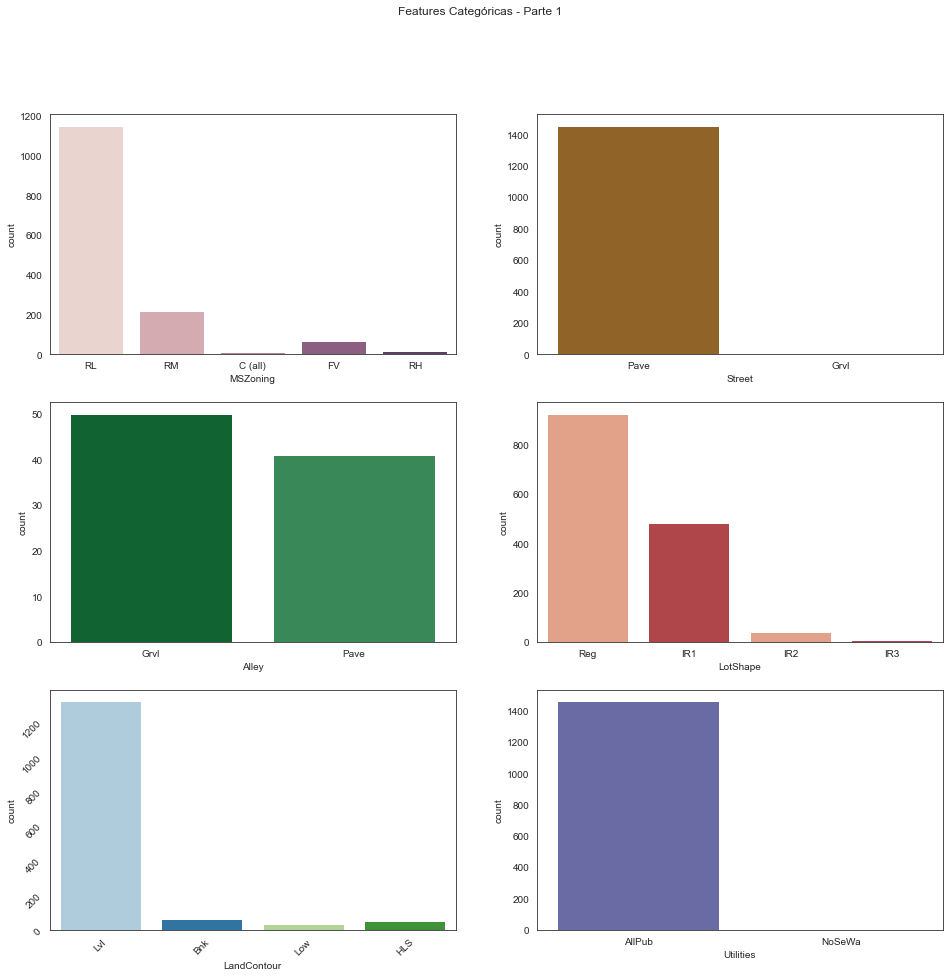

In [571]:
sns.set_style('white') 
fig, ax = plt.subplots(3,2,figsize=(16,15))
fig.suptitle('Features Categóricas - Parte 1 ')
sns.countplot(cat_attributes['MSZoning'], ax=ax[0][0], palette=sns.cubehelix_palette())
sns.countplot(cat_attributes['Street'], ax=ax[0][1], palette=sns.color_palette('BrBG'))
sns.countplot(cat_attributes['Alley'], ax=ax[1][0], palette=sns.color_palette('BuGn_r'))
sns.countplot(cat_attributes['LotShape'], ax=ax[1][1],palette=sns.color_palette('RdBu_r')[4:])
sns.countplot(cat_attributes['LandContour'], ax=ax[2][0], palette=sns.color_palette('Paired'))
sns.countplot(cat_attributes['Utilities'], ax=ax[2][1],palette=sns.light_palette('navy')[3:])

ax[2][0].tick_params(labelrotation=45)


### Análises e Insights

#### Variáveis Categóricas - Parte  1

- MSZoning é uma variável qualitativa nominal e refere-se a classificação geral de zoneamento. Apresenta 5 categorias

- PavedDrive é uma variável qualitativa nominal e binária, e refere-se se a calçada é pavimentada ou não

- Alley é uma variável qualitativa nominal e binária, e refere-se se o acesso ao beco é pavimentada ou não

- LotShape deve ser uma variável qualitativa ordinal, e refere-se a forma geral da propriedade com 4 categorias 

- LandContour é uma variável qualitativa nominal, e diz informa sobre a planicidade da propriedade

- Utilities é uma variável qualitativa nominal e binária, e refere-se ao tipo de utilitários disponíveis
    

C:\Users\jam06\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jam06\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jam06\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jam06\anaconda3\lib\si

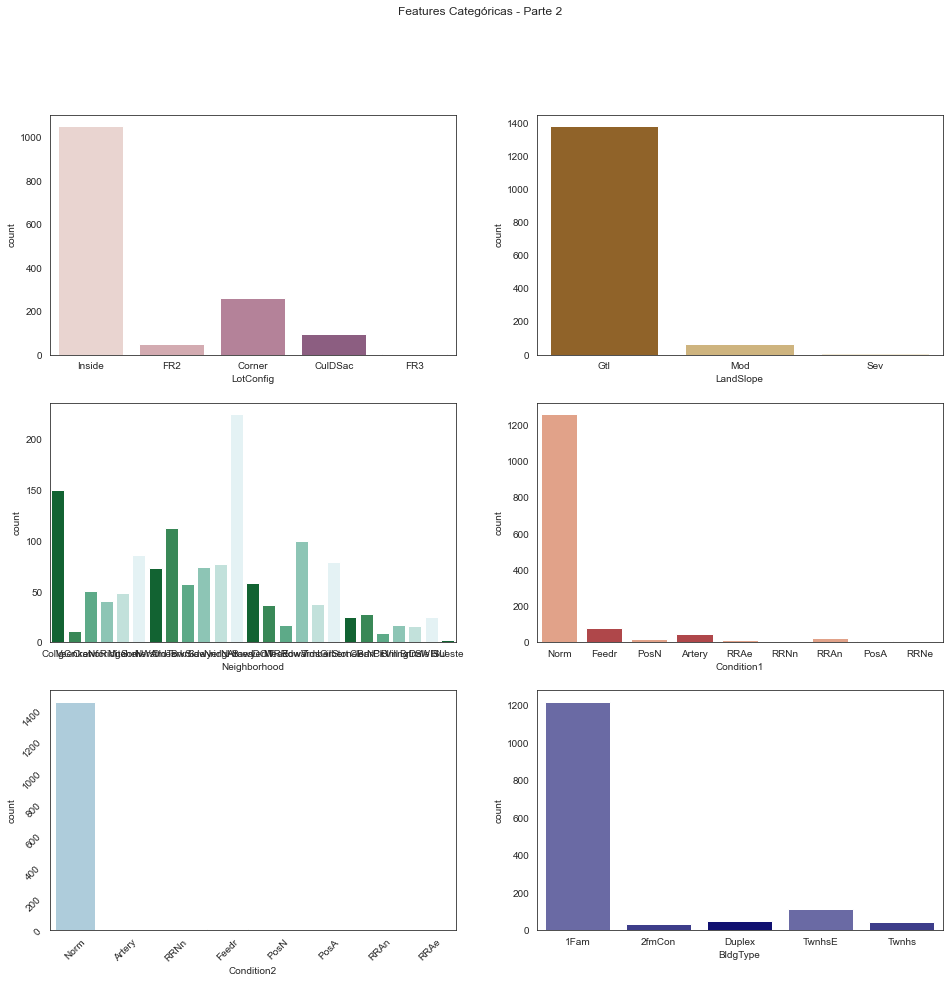

In [572]:
sns.set_style('white') 
fig, ax = plt.subplots(3,2,figsize=(16,15))
fig.suptitle('Features Categóricas - Parte 2 ')
sns.countplot(cat_attributes['LotConfig'], ax=ax[0][0], palette=sns.cubehelix_palette())
sns.countplot(cat_attributes['LandSlope'], ax=ax[0][1], palette=sns.color_palette('BrBG'))
sns.countplot(cat_attributes['Neighborhood'], ax=ax[1][0], palette=sns.color_palette('BuGn_r'))
sns.countplot(cat_attributes['Condition1'], ax=ax[1][1],palette=sns.color_palette('RdBu_r')[4:])
sns.countplot(cat_attributes['Condition2'], ax=ax[2][0], palette=sns.color_palette('Paired'))
sns.countplot(cat_attributes['BldgType'], ax=ax[2][1],palette=sns.light_palette('navy')[3:])

ax[2][0].tick_params(labelrotation=45)

#### Variáveis Categóricas - Parte  2

- LotConfig é uma variável qualitativa nominal e refere-se a configuração do lote. Apresenta 5 categorias

- LandSlope é uma variável qualitativa nominal com 3 categorias, e refere-se ao declive da propriedade

- Neighborhood é uma variável qualitativa com 25 categorias, e refere-se aos locais físicos dentro dos limites da cidade de Ames

- Condition1 é uma variável qualitativa nominal com 9 categorias, e refere-se a proximidade de estrada principal ou ferrovia

- Condition2 é uma variável qualitativa nominal com 8 categorias, e refere-se a proximidade da estrada principal ou ferrovia (se houver uma segunda)

- BldgType é uma variável qualitativa nominal com 6 categorias, e refere-se ao tipo de habitação

C:\Users\jam06\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jam06\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jam06\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jam06\anaconda3\lib\si

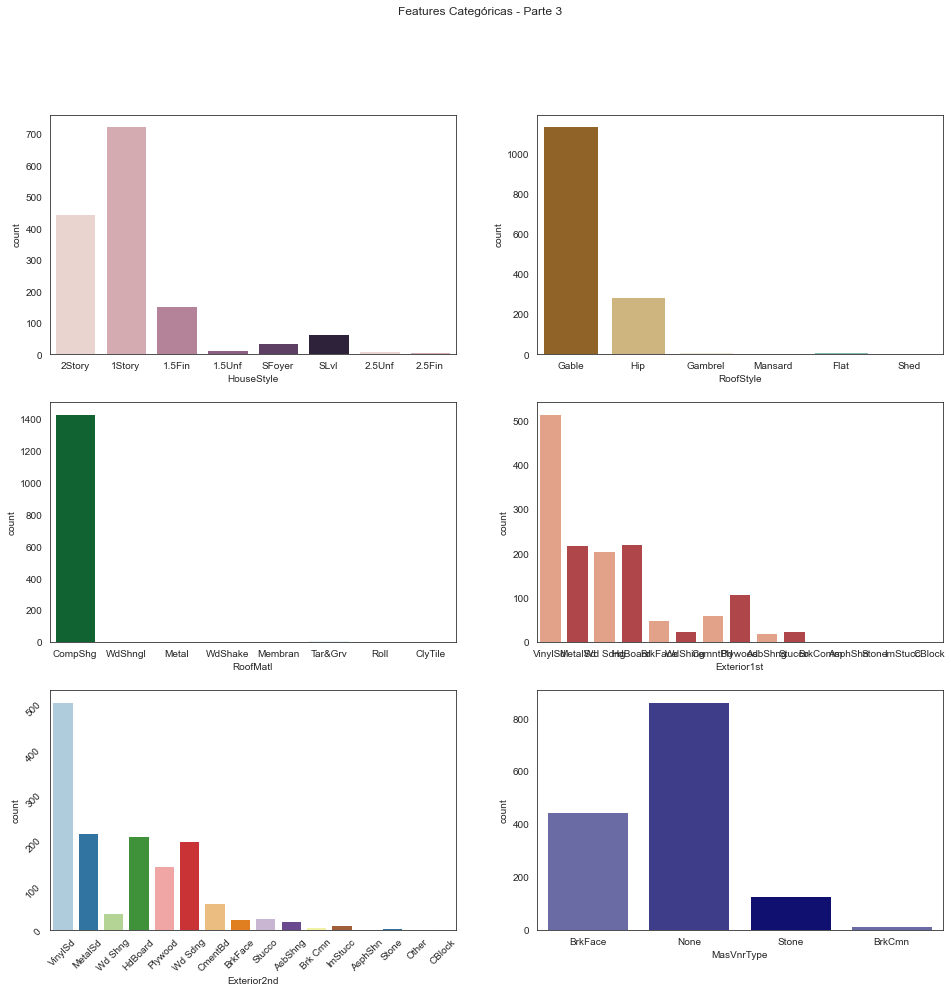

In [573]:
sns.set_style('white') 
fig, ax = plt.subplots(3,2,figsize=(16,15))
fig.suptitle('Features Categóricas - Parte 3 ')
sns.countplot(cat_attributes['HouseStyle'], ax=ax[0][0], palette=sns.cubehelix_palette())
sns.countplot(cat_attributes['RoofStyle'], ax=ax[0][1], palette=sns.color_palette('BrBG'))
sns.countplot(cat_attributes['RoofMatl'], ax=ax[1][0], palette=sns.color_palette('BuGn_r'))
sns.countplot(cat_attributes['Exterior1st'], ax=ax[1][1],palette=sns.color_palette('RdBu_r')[4:])
sns.countplot(cat_attributes['Exterior2nd'], ax=ax[2][0], palette=sns.color_palette('Paired'))
sns.countplot(cat_attributes['MasVnrType'], ax=ax[2][1],palette=sns.light_palette('navy')[3:])

ax[2][0].tick_params(labelrotation=45)

#### Variáveis Categóricas - Parte  3

- HouseStyle é uma variável qualitativa nominal com 8 categorias e refere-se ao estilo de habitação

- RoofStyle é uma variável qualitativa nominal com 6 categorias, e refere-se ao tipo de telhado

- RoofMatl é uma variável qualitativa com 8 categorias, e refere-se ao material do telhado

- Exterior1st é uma variável qualitativa nominal com 15 categorias, e refere-se ao revestimento exterior em casa

- Exterior2nd é uma variável qualitativa nominal com 16 categorias, e refere-se ao revestimento externo da casa (se houver mais de um material)

- MasVnrType é uma variável qualitativa nominal com 4 categorias, e refere-se ao tipo de folheado de alvenaria

C:\Users\jam06\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jam06\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jam06\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jam06\anaconda3\lib\si

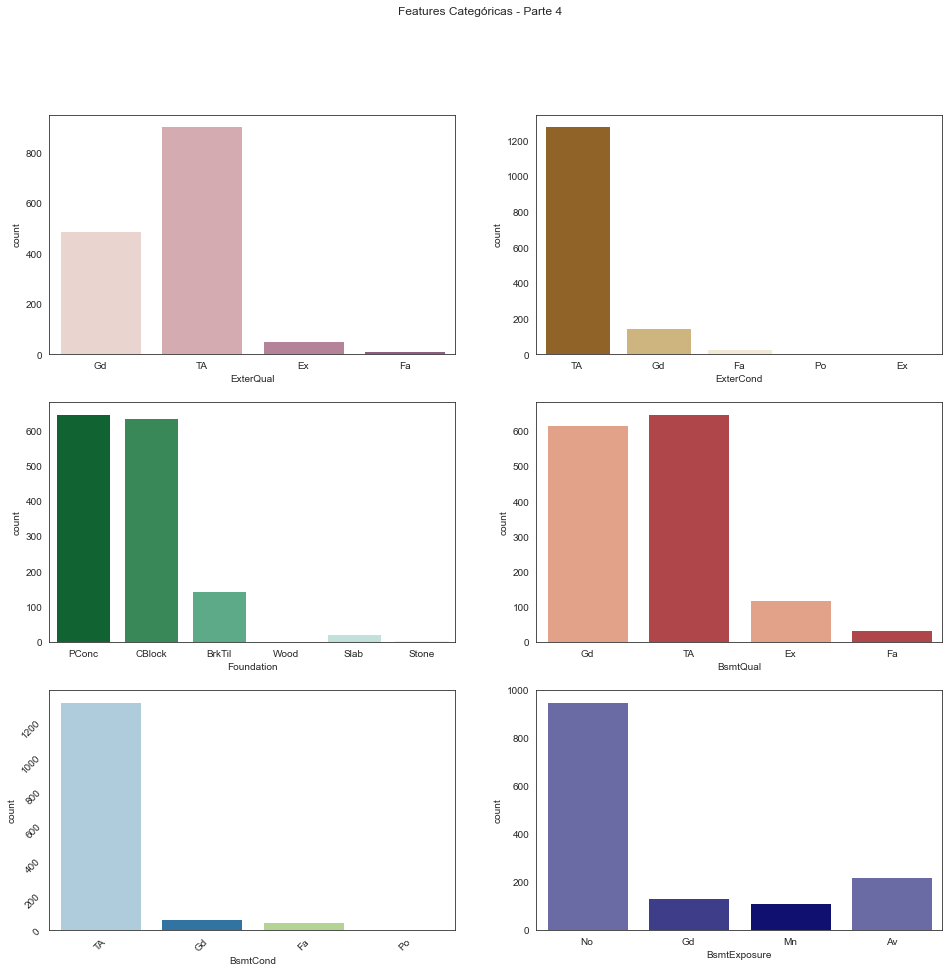

In [574]:
sns.set_style('white') 
fig, ax = plt.subplots(3,2,figsize=(16,15))
fig.suptitle('Features Categóricas - Parte 4 ')
sns.countplot(cat_attributes['ExterQual'], ax=ax[0][0], palette=sns.cubehelix_palette())
sns.countplot(cat_attributes['ExterCond'], ax=ax[0][1], palette=sns.color_palette('BrBG'))
sns.countplot(cat_attributes['Foundation'], ax=ax[1][0], palette=sns.color_palette('BuGn_r'))
sns.countplot(cat_attributes['BsmtQual'], ax=ax[1][1],palette=sns.color_palette('RdBu_r')[4:])
sns.countplot(cat_attributes['BsmtCond'], ax=ax[2][0], palette=sns.color_palette('Paired'))
sns.countplot(cat_attributes['BsmtExposure'], ax=ax[2][1],palette=sns.light_palette('navy')[3:])

ax[2][0].tick_params(labelrotation=45)

#### Variáveis Categóricas - Parte  4

- ExterQual é uma variável qualitativa ordinal com 4 categorias e refere-se a qualidade do material exterior

- ExterCond é uma variável qualitativa ordinal com 5 categorias, e refere-se ao estado atual do material no exterior

- Foundation é uma variável qualitativa nominal com 6 categorias, e refere-se ao tipo de fundação

- BsmtQual é uma variável qualitativa ordinal com 4 categorias, e refere-se a altura do porão

- BsmtCond é uma variável qualitativa ordinal com 4 categorias, e refere-se ao estado geral da cave

- BsmtExposure é uma variável qualitativa nominal com 4 categorias, e refere-se a paredes do porão no nível do jardim ou paralisação

C:\Users\jam06\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jam06\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jam06\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jam06\anaconda3\lib\si

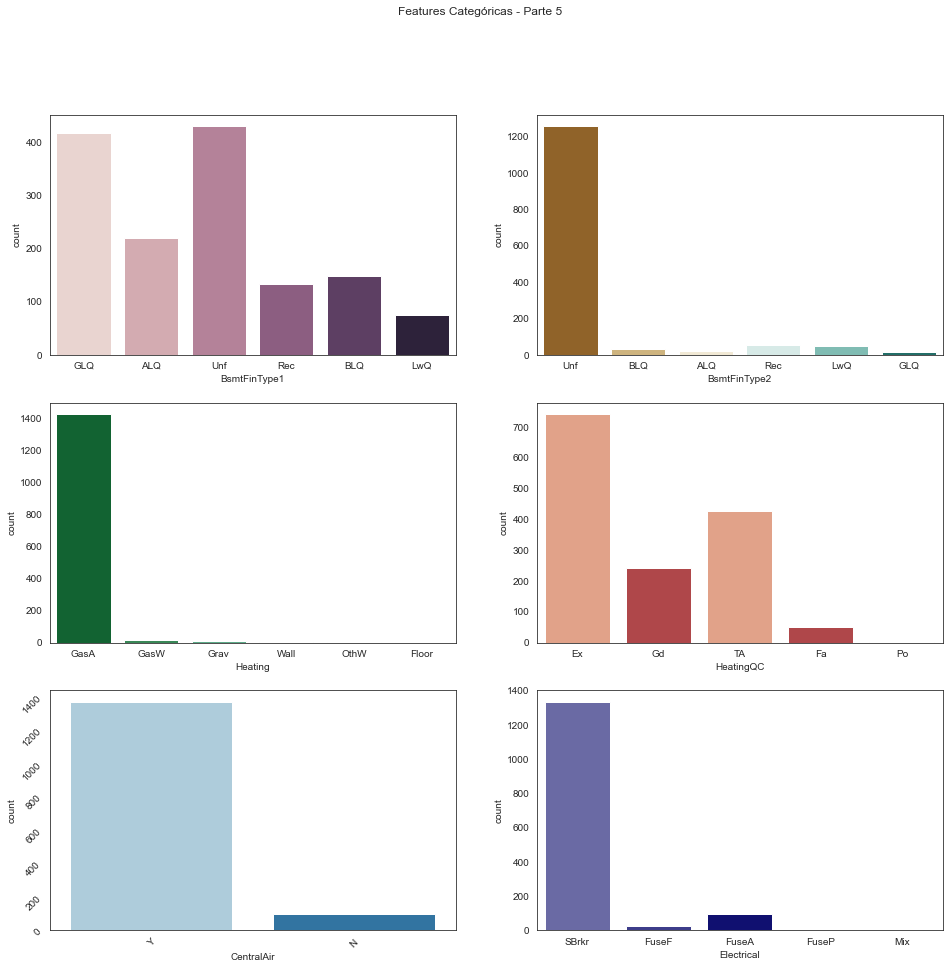

In [575]:
sns.set_style('white') 
fig, ax = plt.subplots(3,2,figsize=(16,15))
fig.suptitle('Features Categóricas - Parte 5 ')
sns.countplot(cat_attributes['BsmtFinType1'], ax=ax[0][0], palette=sns.cubehelix_palette())
sns.countplot(cat_attributes['BsmtFinType2'], ax=ax[0][1], palette=sns.color_palette('BrBG'))
sns.countplot(cat_attributes['Heating'], ax=ax[1][0], palette=sns.color_palette('BuGn_r'))
sns.countplot(cat_attributes['HeatingQC'], ax=ax[1][1],palette=sns.color_palette('RdBu_r')[4:])
sns.countplot(cat_attributes['CentralAir'], ax=ax[2][0], palette=sns.color_palette('Paired'))
sns.countplot(cat_attributes['Electrical'], ax=ax[2][1],palette=sns.light_palette('navy')[3:])

ax[2][0].tick_params(labelrotation=45)

#### Variáveis Categóricas - Parte  5

- BsmtFinType1 é uma variável qualitativa ordinal com 6 categorias e refere-se a qualidade da área acabada do porão

- BsmtFinType2  é uma variável qualitativa ordinal com 6 categorias, e refere-se a qualidade da segunda área acabada (se presente)

- Heating é uma variável qualitativa nominal com 6 categorias, e refere-se ao tipo de aquecimento

- HeatingQC é uma variável qualitativa ordinal com 5 categorias, e refere-se a qualidade e condição do aquecimento

- CentralAir é uma variável qualitativa nominal e  com 2 categorias, e refere-se se existe ou não ar condicionado central

- Electrical é uma variável qualitativa nominal com 5 categorias, e refere-se ao tipo de Sistema elétrico

C:\Users\jam06\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jam06\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jam06\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jam06\anaconda3\lib\si

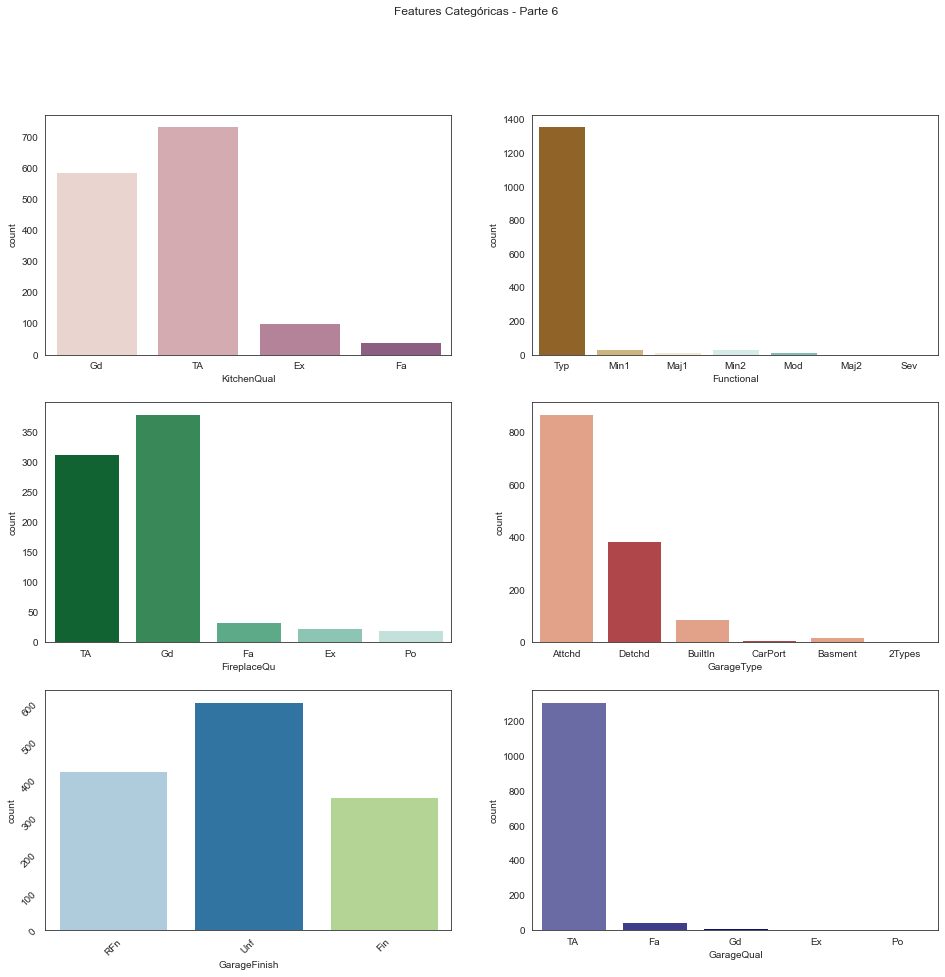

In [504]:
sns.set_style('white') 
fig, ax = plt.subplots(3,2,figsize=(16,15))
fig.suptitle('Features Categóricas - Parte 6 ')
sns.countplot(cat_attributes['KitchenQual'], ax=ax[0][0], palette=sns.cubehelix_palette())
sns.countplot(cat_attributes['Functional'], ax=ax[0][1], palette=sns.color_palette('BrBG'))
sns.countplot(cat_attributes['FireplaceQu'], ax=ax[1][0], palette=sns.color_palette('BuGn_r'))
sns.countplot(cat_attributes['GarageType'], ax=ax[1][1],palette=sns.color_palette('RdBu_r')[4:])
sns.countplot(cat_attributes['GarageFinish'], ax=ax[2][0], palette=sns.color_palette('Paired'))
sns.countplot(cat_attributes['GarageQual'], ax=ax[2][1],palette=sns.light_palette('navy')[3:])

ax[2][0].tick_params(labelrotation=45)

#### Variáveis Categóricas - Parte  6

- KitchenQual é uma variável qualitativa ordinal com 4 categorias e refere-se a qualidade da cozinha

- Functional  é uma variável qualitativa nominal com 7 categorias, e refere-se a avaliação da funcionalidade da casa

- FireplaceQu é uma variável qualitativa ordinal com 5 categorias, e refere-se a qualidade da lareira

- GarageType é uma variável qualitativa nominal com 6 categorias, e refere-se a localização da garagem

- GarageFinish é uma variável qualitativa nominal e  com 3 categorias, e refere-se se ao acabamento interno da garagem

- GarageQual é uma variável qualitativa nominal com 5 categorias, e refere-se a qualidade da garagem

C:\Users\jam06\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jam06\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jam06\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jam06\anaconda3\lib\si

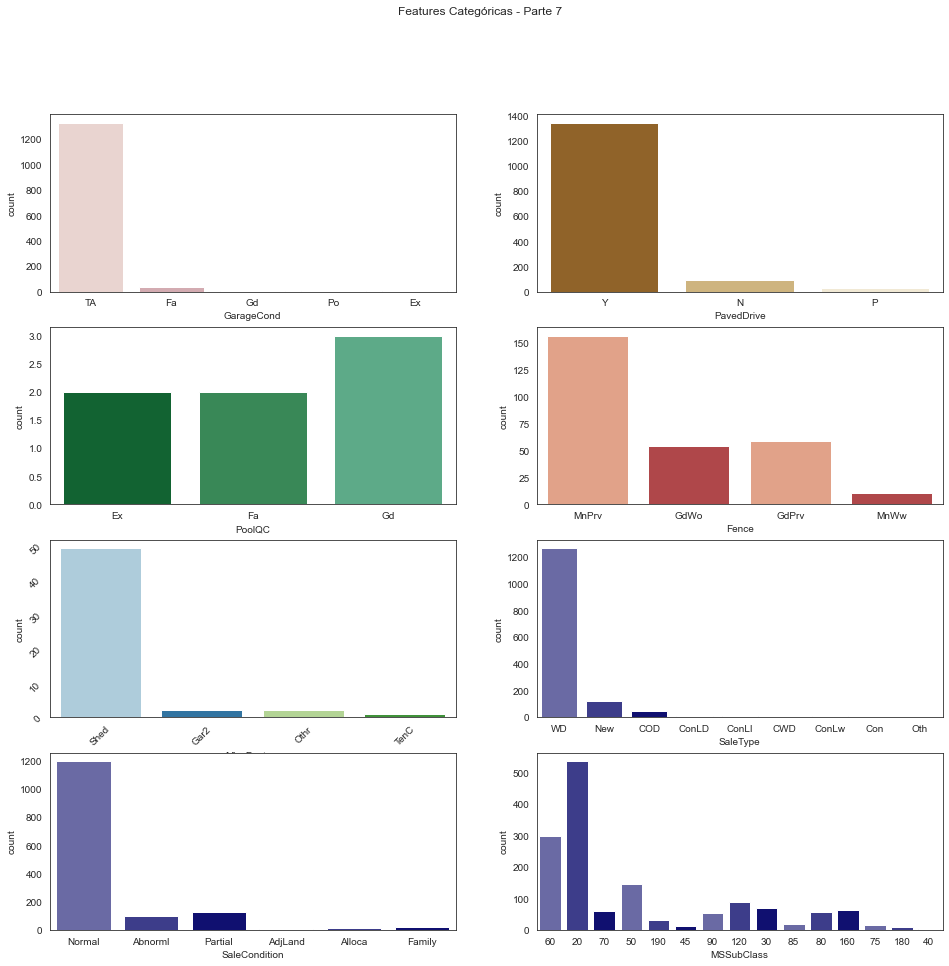

In [505]:
sns.set_style('white') 
fig, ax = plt.subplots(4,2,figsize=(16,15))
fig.suptitle('Features Categóricas - Parte 7 ')
sns.countplot(cat_attributes['GarageCond'], ax=ax[0][0], palette=sns.cubehelix_palette())
sns.countplot(cat_attributes['PavedDrive'], ax=ax[0][1], palette=sns.color_palette('BrBG'))
sns.countplot(cat_attributes['PoolQC'], ax=ax[1][0], palette=sns.color_palette('BuGn_r'))
sns.countplot(cat_attributes['Fence'], ax=ax[1][1],palette=sns.color_palette('RdBu_r')[4:])
sns.countplot(cat_attributes['MiscFeature'], ax=ax[2][0], palette=sns.color_palette('Paired'))
sns.countplot(cat_attributes['SaleType'], ax=ax[2][1],palette=sns.light_palette('navy')[3:])
sns.countplot(cat_attributes['SaleCondition'], ax=ax[3][0],palette=sns.light_palette('navy')[3:])
sns.countplot(cat_attributes['MSSubClass'], ax=ax[3][1],palette=sns.light_palette('navy')[3:])


ax[2][0].tick_params(labelrotation=45)

#### Variáveis Categóricas - Parte  7

- GarageCond é uma variável qualitativa ordinal com 5 categorias e refere-se a qualidade da garagem

- PavedDrive  é uma variável qualitativa nominal com 3 categorias, e diz respeito a calçada pavimentada

- PoolQC é uma variável qualitativa ordinal com 3 categorias, e refere-se a qualidade da piscina

- Fence é uma variável qualitativa nominal com 4 categorias, e refere-se a qualidade da cerca

- MiscFeature é uma variável qualitativa nominal e  com 4 categorias, e refere-se a recurso variado não coberto em outras categorias

- SaleType é uma variável qualitativa nominal com 9 categorias, e refere-se ao tipo de venda

- SaleCondition é uma variável qualitativa nominal com 6 categorias, e refere-se a condição da venda

- MSSubClass é uma variável qualitativa nominal com 15 categorias, e identifica o tipo de habitação envolvido na venda.

# 2.4.7.2.Resumo - Entendimento dos dados - Variáveis categóricas

Na etapa 2  - Entendimento dos dados para as variáveis categóricas, foi observado que o dataset possui:


 - 43 variáveis categóricas, sendo:
 
     - 29 do tipo qualitativa nominal
     - E também 14 do tipo qualitativa ordinal
      
- 1 variável apresentou pelo menos uma obsevação com missing e precisam ser criadas estratégias para tratamento;


## 3. Pré-Processamento dos dados 

Nesta etapa foram utilizadas técnicas de pré-processamento de dados com o objetivo de preparar os dados para aplicação das técnicas de aprendizado de máquina. 

Etapas realizadas: 

* Identificação de dados faltantes
* Exclusão de variáveis categóricas com alto desbalanceamento entre as categorias
* Separação das variáveis explicativas e variável resposta
* Separar base de treino e teste
* Imputação de dados das variáveis numéricas 
* Imputação de dados das variáveis categóricas 
* Pré-Processamento das variáveis numéricas com a função MinMaxScaler()
* Pré-Processamento das variáveis categóricas com a função get_dummies
* Validação cruzada K-fold
* Pré-processamento das bases  X_Test e Teste

## 3.1.Identificando dados faltantes

In [717]:
df.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
2ndFlrSF            0
LowQualFinSF        0
BsmtHalfBath        0
BedroomAbv

In [720]:
def df_missing(df):
    
    Variavel = []
    unique = []
    tipo = []
    qtd = []
    missing = []
    per_missing = []
    
    for item in df.columns:
        Variavel.append(item)
        tipo.append(df[item].dtype)
        qtd.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        per_missing.append(round((df[item].isna().sum() / len(df[item])) * 100, 2))

    output = pd.DataFrame({
        'Variavel': Variavel, 
        'Tipo': tipo,
        'perc_missing': per_missing
    })    
        
    return output

In [763]:
df_na = df_missing(df)
df_na.sort_values(by="perc_missing", ascending=False)

,Variavel,Tipo,perc_missing
62,PoolQC,object,99.52
64,MiscFeature,object,96.30
5,Alley,object,93.77
63,Fence,object,80.75
50,FireplaceQu,object,47.26
2,LotFrontage,float64,17.74
53,GarageQual,object,5.55
51,GarageType,object,5.55
52,GarageFinish,object,5.55
54,GarageCond,object,5.55


In [579]:
#Salvando a base com as informações das variáveis com % de missing
path = 'df_na_na.csv'
df_na.to_csv(path, sep = ';', header = True, decimal='.')

In [722]:
# Analisar con maior atenção as variáveis com mais de 20% de missing 
to_drop_na = df_na[df_na['perc_missing'] > 20]
to_drop_na 

,Variavel,Tipo,perc_missing
5,Alley,object,93.77
50,FireplaceQu,object,47.26
62,PoolQC,object,99.52
63,Fence,object,80.75
64,MiscFeature,object,96.30


### Análises e Insights

- 5 Variáveis apresentaram mais de 20% de missing, e de acordo com as descrições dessas variáveis temos:

     - Alley: a descrição dos dados diz que NA significa "sem acesso ao beco"
     - FireplaceQu: a descrição dos dados diz que NA significa "sem lareira"
     - PoolQC:A descrição dos dados diz que NA significa "Sem piscina".
     - Fence: a descrição dos dados diz que NA significa "sem cerca"
     - MiscFeature:a descrição dos dados diz que NA significa "nenhum recurso variado"
     
     
 Logo as observações com NA serão preenchidas com uma nova categoria "Nenhum", fazendo referência a ausência do atributo

## 3.2. Exclusão de variáveis categóricas com alto desbalanceamento entre as categorias

Na EDA para as variáveis categóricas foi identificado dois possíveis problemas:

 - 1) Algumas categorias de variáveis representavam mais de 90% de toda a variável
 
- 2) Algumas categorias com baixíssima participação, e esse tipo de situação pode trazer problemas por exemplo de não existirem essas categorias na base de teste, além dessas categorias "dificultarem" o aprendizado do algoritmo por falta de dados com essas características.
 
- A estratégia utilizada exclusivamente nesse estudo e por não conseguir insights com as áreas de negócios, optarei por excluir essas variáveis

In [764]:
df = df.drop(columns = ["LotConfig",
"Neighborhood",
"Condition1",
"Condition2",
"RoofMatl",
"Exterior1st",
"Exterior2nd",
"Foundation",
"BsmtCond",
"Heating",
"HeatingQC",
"Electrical",
"Functional",
"GarageQual",
"SaleType",
"MiscFeature",
"ExterCond",
"Utilities",
"PoolQC",
"GarageCond"])

## 3.3. Separando Dataset

In [765]:
y = df['SalePrice'] # variável resposta
X = df 
X = df.drop('SalePrice',axis = 1) # variáveis explicativas
X
X.shape, y.shape

((1460, 50), (1460,))

## 3.4.Split Dataset 

In [766]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=0)
X_train.shape , y_train.shape , X_test.shape , y_test.shape

print("Número de observações do dataset de treino: ", len(X_train))
print("Número de observações do dataset de teste: ", len(X_test))
print("Total do número de observações do dataset: ", len(X_train)+len(X_test))


# print proportions
print('train: {}% | Test: {}%'.format( round(len(y_train)/len(y),2), 
                                                        round(len(y_test)/len(y),2) ) )

Número de observações do dataset de treino:  730
Número de observações do dataset de teste:  730
Total do número de observações do dataset:  1460
train: 0.5% | Test: 0.5%


## 3.5.Imputação de dados


Estratégias para imputação de dados:

 
- Uso somente na base de treino e o objeto gerado será aplicado na base de teste
 
- Variáveis numéricas: Será utilizado a função KNNImputer do Sklearn 
 
- Variáveis categóricas : 
        - De acordo com a descrição do dataset, as variáveis com valores de missing representan a ausência da variável e não um problema de preenchimento, para essa situação será imputado com a categoria "Nenhum"


## 3.5.1.Imputação de dados - Variáveis numéricas

In [767]:
num = [col for col in X_train.columns if X_train [col].dtypes !='O']

In [768]:
X_train[num].head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,BsmtHalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,,,,,,
734,80.0,10000,5,6,1961,1983,0.0,594,0,270,864,0,0,0,3,1,1,165,0,0,0,0,0,400,3,2009
383,79.0,9245,7,5,2006,2006,0.0,0,0,939,939,858,0,0,3,1,0,144,53,0,0,0,0,0,4,2007
1233,70.0,9842,4,5,1962,1962,0.0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,3,2007
1355,NaN,10316,7,5,2000,2000,0.0,735,0,257,992,873,0,0,3,1,1,0,184,0,0,0,0,0,6,2008
332,70.0,8176,5,6,1958,1992,0.0,846,0,210,1056,0,0,0,3,1,0,0,0,0,0,0,0,0,8,2007


In [769]:
# Uso dos argumentos do KNNImputer com os parâmetros default
imputer = KNNImputer(n_neighbors = 5, weights = 'uniform',metric='nan_euclidean')
X_train[num]= imputer.fit_transform(X_train[num])

In [770]:
X_train[num] = pd.DataFrame(data=X_train[num], columns = X_train[num].columns)

In [771]:
# Verificando se a imputação foi realizada corretamente
X_train[num].isna().sum()

LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
2ndFlrSF         0
LowQualFinSF     0
BsmtHalfBath     0
BedroomAbvGr     0
KitchenAbvGr     0
Fireplaces       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

## 3.5.2.Imputação de dados - Variáveis Categóricas

In [775]:
#Estratégia 2.1: Para esse grupo de variáveis de acordo com as descrições do dataset, as observações sem valores preenchidos
#refere-se a ausência do atributo, logo, serão preenchidas com uma nova categoria, "Nenhum"

X_train['Alley'].fillna("Nenhum", inplace=True)
X_train['FireplaceQu'].fillna("Nenhum", inplace=True)
X_train['Fence'].fillna("Nenhum", inplace=True)
X_train['GarageType'].fillna("Nenhum", inplace=True)
X_train['GarageFinish'].fillna("Nenhum", inplace=True)
X_train['MasVnrType'].fillna("Nenhum", inplace=True)

In [776]:
#Estratégia 2.2: BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 e BsmtFinType2 : 
#Para todos esses recursos categóricos relacionados ao porão, NaN significa que não há porão

X_train['BsmtQual'].fillna("Nenhum", inplace=True)
X_train['BsmtExposure'].fillna("Nenhum", inplace=True)
X_train['BsmtFinType1'].fillna("Nenhum", inplace=True)
X_train['BsmtFinType2'].fillna("Nenhum", inplace=True)    
X_train['LotFrontage'].fillna("Nenhum", inplace=True)  

In [777]:
# Verificar tratamentos realizados
X_train[num].isna().sum()

LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
2ndFlrSF         0
LowQualFinSF     0
BsmtHalfBath     0
BedroomAbvGr     0
KitchenAbvGr     0
Fireplaces       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

## 3.6 Pré-Processamento das variáveis

In [778]:
X_train[num].head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,BsmtHalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,,,,,,
734,80.0,10000.0,5.0,6.0,1961.0,1983.0,0.0,594.0,0.0,270.0,864.0,0.0,0.0,0.0,3.0,1.0,1.0,165.0,0.0,0.0,0.0,0.0,0.0,400.0,3.0,2009.0
383,79.0,9245.0,7.0,5.0,2006.0,2006.0,0.0,0.0,0.0,939.0,939.0,858.0,0.0,0.0,3.0,1.0,0.0,144.0,53.0,0.0,0.0,0.0,0.0,0.0,4.0,2007.0
1233,70.0,9842.0,4.0,5.0,1962.0,1962.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2007.0
1355,80.0,10316.0,7.0,5.0,2000.0,2000.0,0.0,735.0,0.0,257.0,992.0,873.0,0.0,0.0,3.0,1.0,1.0,0.0,184.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0
332,70.0,8176.0,5.0,6.0,1958.0,1992.0,0.0,846.0,0.0,210.0,1056.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0


## 3.6.1 Separando as variáveis categóricas

In [779]:
X_cat = list(set(X_train)-set(X_train[num]))
X_cat

['GarageType',
 'BsmtExposure',
 'Fence',
 'MasVnrType',
 'HouseStyle',
 'MSZoning',
 'Street',
 'GarageFinish',
 'MSSubClass',
 'RoofStyle',
 'PavedDrive',
 'SaleCondition',
 'ExterQual',
 'BldgType',
 'BsmtFinType2',
 'FireplaceQu',
 'LandContour',
 'BsmtQual',
 'BsmtFinType1',
 'LandSlope',
 'CentralAir',
 'Alley',
 'LotShape',
 'KitchenQual']

In [780]:
X_dummies=X_train[X_cat]
X_dummies

,GarageType,BsmtExposure,Fence,MasVnrType,HouseStyle,MSZoning,Street,GarageFinish,MSSubClass,RoofStyle,PavedDrive,SaleCondition,ExterQual,BldgType,BsmtFinType2,FireplaceQu,LandContour,BsmtQual,BsmtFinType1,LandSlope,CentralAir,Alley,LotShape,KitchenQual
Id,,,,,,,,,,,,,,,,,,,,,,,,
734,Attchd,No,GdWo,None,1Story,RL,Pave,RFn,20,Hip,Y,Normal,TA,1Fam,Unf,TA,Lvl,TA,BLQ,Gtl,Y,Nenhum,Reg,TA
383,Attchd,Av,Nenhum,None,2Story,RL,Pave,RFn,60,Gable,Y,Normal,Gd,1Fam,Unf,Nenhum,Lvl,Gd,Unf,Gtl,Y,Nenhum,IR1,Gd
1233,CarPort,Nenhum,Nenhum,None,1Story,RL,Pave,Unf,90,Gable,Y,Normal,TA,Duplex,Nenhum,Nenhum,Lvl,Nenhum,Nenhum,Gtl,Y,Nenhum,Reg,TA
1355,Attchd,No,Nenhum,None,2Story,RL,Pave,RFn,60,Gable,Y,Normal,Gd,1Fam,Unf,TA,Lvl,Gd,GLQ,Gtl,Y,Nenhum,IR1,Gd
332,Attchd,No,Nenhum,None,1Story,RL,Pave,RFn,20,Gable,Y,Normal,TA,1Fam,Unf,Nenhum,Lvl,TA,Rec,Gtl,Y,Nenhum,Reg,TA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,Attchd,Mn,Nenhum,BrkFace,2Story,RL,Pave,RFn,60,Gable,Y,Normal,Gd,1Fam,Unf,Gd,Lvl,Gd,GLQ,Gtl,Y,Nenhum,Reg,Gd
836,Attchd,No,Nenhum,None,1Story,RL,Pave,Unf,20,Gable,Y,Normal,TA,1Fam,Unf,Nenhum,Lvl,Gd,BLQ,Gtl,Y,Nenhum,Reg,Gd
1217,Attchd,Nenhum,Nenhum,None,1.5Fin,RM,Pave,Unf,90,Gable,Y,Normal,TA,Duplex,Nenhum,Nenhum,Lvl,Nenhum,Nenhum,Gtl,Y,Nenhum,Reg,TA


## 3.6.1 Pré-processamento das variáveis categóricas

In [781]:
X_final = pd.get_dummies (data = X_train,columns=X_cat)
X_final

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,BsmtHalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Nenhum,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_Nenhum,BsmtExposure_No,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_Nenhum,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Nenhum,MasVnrType_None,MasVnrType_Stone,HouseStyle_1.5Fin,HouseStyle_1.5Unf,...,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Nenhum,BsmtFinType2_Rec,BsmtFinType2_Unf,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Nenhum,FireplaceQu_Po,FireplaceQu_TA,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Nenhum,BsmtQual_TA,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Nenhum,BsmtFinType1_Rec,BsmtFinType1_Unf,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,CentralAir_N,CentralAir_Y,Alley_Grvl,Alley_Nenhum,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
734,80.0,10000.0,5.0,6.0,1961.0,1983.0,0.0,594.0,0.0,270.0,864.0,0.0,0.0,0.0,3.0,1.0,1.0,165.0,0.0,0.0,0.0,0.0,0.0,400.0,3.0,2009.0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
383,79.0,9245.0,7.0,5.0,2006.0,2006.0,0.0,0.0,0.0,939.0,939.0,858.0,0.0,0.0,3.0,1.0,0.0,144.0,53.0,0.0,0.0,0.0,0.0,0.0,4.0,2007.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0
1233,70.0,9842.0,4.0,5.0,1962.0,1962.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2007.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
1355,80.0,10316.0,7.0,5.0,2000.0,2000.0,0.0,735.0,0.0,257.0,992.0,873.0,0.0,0.0,3.0,1.0,1.0,0.0,184.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0
332,70.0,8176.0,5.0,6.0,1958.0,1992.0,0.0,846.0,0.0,210.0,1056.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,82.0,9430.0,8.0,5.0,1999.0,1999.0,673.0,1163.0,0.0,89.0,1252.0,1097.0,0.0,0.0,3.0,1.0,1.0,0.0,128.0,0.0,0.0,180.0,0.0,0.0,7.0,2009.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0
836,60.0,9600.0,4.0,7.0,1950.0,1995.0,0.0,442.0,0.0,625.0,1067.0,0.0,0.0,0.0,2.0,1.0,0.0,290.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0
1217,68.0,8930.0,6.0,5.0,1978.0,1978.0,0.0,0.0,0.0,0.0,0.0,584.0,0.0,

## 3.6.2 Pré-processamento das variáveis numéricas

In [782]:
scaler = MinMaxScaler()
X_final[num] = scaler.fit_transform(X_final[num])
X_final[num]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,BsmtHalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,,,,,,
734,0.385621,0.040665,0.444444,0.625,0.637037,0.550000,0.000000,0.311975,0.0,0.137125,0.269495,0.000000,0.0,0.0,0.375,0.333333,0.333333,0.226648,0.000000,0.0,0.0,0.000,0.0,0.025806,0.181818,0.75
383,0.379085,0.037136,0.666667,0.500,0.970370,0.933333,0.000000,0.000000,0.0,0.476892,0.292888,0.458333,0.0,0.0,0.375,0.333333,0.000000,0.197802,0.096892,0.0,0.0,0.000,0.0,0.000000,0.272727,0.25
1233,0.320261,0.039926,0.333333,0.500,0.644444,0.200000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.250,0.666667,0.000000,0.000000,0.000000,0.0,0.0,0.000,0.0,0.000000,0.181818,0.25
1355,0.385621,0.042142,0.666667,0.500,0.925926,0.833333,0.000000,0.386029,0.0,0.130523,0.309420,0.466346,0.0,0.0,0.375,0.333333,0.333333,0.000000,0.336380,0.0,0.0,0.000,0.0,0.000000,0.454545,0.50
332,0.320261,0.032139,0.444444,0.625,0.614815,0.700000,0.000000,0.444328,0.0,0.106653,0.329382,0.000000,0.0,0.0,0.375,0.333333,0.000000,0.000000,0.000000,0.0,0.0,0.000,0.0,0.000000,0.636364,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,0.398693,0.038000,0.777778,0.500,0.918519,0.816667,0.420625,0.610819,0.0,0.045201,0.390518,0.586004,0.0,0.0,0.375,0.333333,0.333333,0.000000,0.234004,0.0,0.0,0.375,0.0,0.000000,0.545455,0.75
836,0.254902,0.038795,0.333333,0.750,0.555556,0.750000,0.000000,0.232143,0.0,0.317420,0.332813,0.000000,0.0,0.0,0.250,0.333333,0.000000,0.398352,0.000000,0.0,0.0,0.000,0.0,0.000000,0.090909,1.00
1217,0.307190,0.035663,0.555556,0.500,0.762963,0.466667,0.000000,0.000000,0.0,0.000000,0.000000,0.311966,0.0,0.0,0.500,0.666667,0.000000,0.000000,0.000000,0.0,0.0,0.000,0.0,0.000000,0.272727,1.00


In [783]:
X_final
X_train = X_final.copy()
X_train 

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,BsmtHalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Nenhum,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_Nenhum,BsmtExposure_No,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_Nenhum,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Nenhum,MasVnrType_None,MasVnrType_Stone,HouseStyle_1.5Fin,HouseStyle_1.5Unf,...,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Nenhum,BsmtFinType2_Rec,BsmtFinType2_Unf,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Nenhum,FireplaceQu_Po,FireplaceQu_TA,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Nenhum,BsmtQual_TA,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Nenhum,BsmtFinType1_Rec,BsmtFinType1_Unf,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,CentralAir_N,CentralAir_Y,Alley_Grvl,Alley_Nenhum,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
734,0.385621,0.040665,0.444444,0.625,0.637037,0.550000,0.000000,0.311975,0.0,0.137125,0.269495,0.000000,0.0,0.0,0.375,0.333333,0.333333,0.226648,0.000000,0.0,0.0,0.000,0.0,0.025806,0.181818,0.75,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
383,0.379085,0.037136,0.666667,0.500,0.970370,0.933333,0.000000,0.000000,0.0,0.476892,0.292888,0.458333,0.0,0.0,0.375,0.333333,0.000000,0.197802,0.096892,0.0,0.0,0.000,0.0,0.000000,0.272727,0.25,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0
1233,0.320261,0.039926,0.333333,0.500,0.644444,0.200000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.250,0.666667,0.000000,0.000000,0.000000,0.0,0.0,0.000,0.0,0.000000,0.181818,0.25,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
1355,0.385621,0.042142,0.666667,0.500,0.925926,0.833333,0.000000,0.386029,0.0,0.130523,0.309420,0.466346,0.0,0.0,0.375,0.333333,0.333333,0.000000,0.336380,0.0,0.0,0.000,0.0,0.000000,0.454545,0.50,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0
332,0.320261,0.032139,0.444444,0.625,0.614815,0.700000,0.000000,0.444328,0.0,0.106653,0.329382,0.000000,0.0,0.0,0.375,0.333333,0.000000,0.000000,0.000000,0.0,0.0,0.000,0.0,0.000000,0.636364,0.25,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,0.398693,0.038000,0.777778,0.500,0.918519,0.816667,0.420625,0.610819,0.0,0.045201,0.390518,0.586004,0.0,0.0,0.375,0.333333,0.333333,0.000000,0.234004,0.0,0.0,0.375,0.0,0.000000,0.545455,0.75,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0

In [784]:
X_train.to_csv('./X_train.csv', sep = ';', header = True, decimal='.',index=False)

## 3.7 Pré-processamento Base X_test

In [785]:
#imputação de dados - variáveis numéricas
imputer = KNNImputer(n_neighbors = 5, weights = 'uniform',metric='nan_euclidean')
X_test[num]= imputer.fit_transform(X_test[num])
X_test[num] = pd.DataFrame(data=X_test[num], columns = X_test[num].columns)

In [787]:
#Estratégia 2.1: Para esse grupo de variáveis de acordo com as descrições do dataset, as observações sem valores preenchidos
#refere-se a ausência do atributo, logo, serão preenchidas com uma nova categoria, "Nenhum"

X_test['Alley'].fillna("Nenhum", inplace=True)
X_test['FireplaceQu'].fillna("Nenhum", inplace=True)
X_test['Fence'].fillna("Nenhum", inplace=True)
X_test['GarageType'].fillna("Nenhum", inplace=True)
X_test['GarageFinish'].fillna("Nenhum", inplace=True)
X_test['MasVnrType'].fillna("Nenhum", inplace=True)

In [788]:
#Estratégia 2.2: BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 e BsmtFinType2 : 
#Para todos esses recursos categóricos relacionados ao porão, NaN significa que não há porão

X_test['BsmtQual'].fillna("Nenhum", inplace=True)
X_test['BsmtExposure'].fillna("Nenhum", inplace=True)
X_test['BsmtFinType1'].fillna("Nenhum", inplace=True)
X_test['BsmtFinType2'].fillna("Nenhum", inplace=True)    


In [789]:
X_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LandSlope,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,MasVnrType,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,2ndFlrSF,LowQualFinSF,BsmtHalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
530,20,RL,129.2,32668.0,Pave,Nenhum,IR1,Lvl,Gtl,1Fam,1Story,6.0,3.0,1957.0,1975.0,Hip,Nenhum,275.6,Gd,TA,No,Rec,1219.0,Unf,0.0,816.0,2035.0,Y,0.0,0.0,0.0,4.0,2.0,TA,2.0,TA,Attchd,RFn,Y,0.0,0.0,200.0,0.0,0.0,0.0,Nenhum,0.0,3.0,2007.0,Alloca
492,50,RL,79.0,9490.0,Pave,Nenhum,Reg,Lvl,Gtl,1Fam,1.5Fin,6.0,7.0,1941.0,1950.0,Gable,None,0.0,TA,TA,No,BLQ,403.0,Rec,165.0,238.0,806.0,Y,620.0,0.0,0.0,3.0,1.0,Fa,2.0,TA,Attchd,Unf,Y,0.0,0.0,32.0,0.0,0.0,0.0,MnPrv,0.0,8.0,2006.0,Normal
460,50,RL,62.0,7015.0,Pave,Nenhum,IR1,Bnk,Gtl,1Fam,1.5Fin,5.0,4.0,1950.0,1950.0,Gable,BrkCmn,161.0,TA,TA,No,LwQ,185.0,Unf,0.0,524.0,709.0,Y,224.0,0.0,0.0,3.0,1.0,Gd,1.0,TA,Detchd,Unf,Y,0.0,0.0,248.0,0.0,0.0,0.0,Nenhum,0.0,7.0,2009.0,Normal
280,60,RL,83.0,10005.0,Pave,Nenhum,Reg,Lvl,Gtl,1Fam,2Story,7.0,5.0,1977.0,1977.0,Hip,BrkFace,299.0,TA,Gd,No,BLQ,392.0,Unf,0.0,768.0,1160.0,Y,866.0,0.0,0.0,4.0,1.0,TA,1.0,TA,Attchd,Fin,Y,288.0,117.0,0.0,0.0,0.0,0.0,Nenhum,0.0,3.0,2008.0,Normal
656,160,RM,21.0,1680.0,Pave,Nenhum,Reg,Lvl,Gtl,Twnhs,2Story,6.0,5.0,1971.0,1971.0,Gable,BrkFace,381.0,TA,TA,No,Unf,0.0,Unf,0.0,525.0,525.0,Y,567.0,0.0,0.0,3.0,1.0,TA,0.0,Nenhum,Detchd,Unf,Y,0.0,0.0,0.0,0.0,0.0,0.0,Nenhum,0.0,3.0,2010.0,Family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,20,RL,90.0,11988.0,Pave,Nenhum,IR1,Lvl,Gtl,1Fam,1Story,6.0,6.0,1957.0,1957.0,Gable,None,0.0,TA,TA,No,Rec,777.0,Unf,0.0,467.0,1244.0,Y,0.0,0.0,0.0,3.0,1.0,TA,2.0,Gd,Attchd,Unf,Y,0.0,40.0,0.0,0.0,0.0,0.0,Nenhum,0.0,5.0,2007.0,Normal
670,30,RL,80.0,11600.0,Pave,Nenhum,Reg,Lvl,Gtl,1Fam,1Story,4.0,5.0,1922.0,1950.0,Gable,None,0.0,TA,Fa,No,Unf,0.0,Unf,0.0,700.0,700.0,Y,0.0,0.0,0.0,2.0,1.0,Fa,1.0,Gd,Detchd,Unf,Y,0.0,0.0,67.0,0.0,0.0,0.0,Nenhum,0.0,7.0,2006.0,Normal
830,160,FV,24.0,2544.0,Pave,Pave,Reg,Lvl,Gtl,Twnhs,2Story,7.0,5.0,2005.0,2005.0,Gable,None,0.0,Gd,Gd,No,Unf,0.0,Unf,0.0,600.0,600.0,Y,623.0,80.0,0.0,2.0,1.0,Gd,0.0,Nenhum,Detchd,RFn,Y,0.0,166.0,0.0,0.0,0.0,0.0,Nenhum,0.0,7.0,2006.0,Normal


In [790]:
X_test_cat = list(set(X_test)-set(X_test[num]))
X_test_cat

['GarageType',
 'BsmtExposure',
 'Fence',
 'MasVnrType',
 'HouseStyle',
 'MSZoning',
 'Street',
 'GarageFinish',
 'MSSubClass',
 'RoofStyle',
 'PavedDrive',
 'SaleCondition',
 'ExterQual',
 'BldgType',
 'BsmtFinType2',
 'FireplaceQu',
 'LandContour',
 'BsmtQual',
 'BsmtFinType1',
 'LandSlope',
 'CentralAir',
 'Alley',
 'LotShape',
 'KitchenQual']

In [791]:
X_test_dummies=X_test[X_test_cat]
X_test_dummies

,GarageType,BsmtExposure,Fence,MasVnrType,HouseStyle,MSZoning,Street,GarageFinish,MSSubClass,RoofStyle,PavedDrive,SaleCondition,ExterQual,BldgType,BsmtFinType2,FireplaceQu,LandContour,BsmtQual,BsmtFinType1,LandSlope,CentralAir,Alley,LotShape,KitchenQual
Id,,,,,,,,,,,,,,,,,,,,,,,,
530,Attchd,No,Nenhum,Nenhum,1Story,RL,Pave,RFn,20,Hip,Y,Alloca,Gd,1Fam,Unf,TA,Lvl,TA,Rec,Gtl,Y,Nenhum,IR1,TA
492,Attchd,No,MnPrv,None,1.5Fin,RL,Pave,Unf,50,Gable,Y,Normal,TA,1Fam,Rec,TA,Lvl,TA,BLQ,Gtl,Y,Nenhum,Reg,Fa
460,Detchd,No,Nenhum,BrkCmn,1.5Fin,RL,Pave,Unf,50,Gable,Y,Normal,TA,1Fam,Unf,TA,Bnk,TA,LwQ,Gtl,Y,Nenhum,IR1,Gd
280,Attchd,No,Nenhum,BrkFace,2Story,RL,Pave,Fin,60,Hip,Y,Normal,TA,1Fam,Unf,TA,Lvl,Gd,BLQ,Gtl,Y,Nenhum,Reg,TA
656,Detchd,No,Nenhum,BrkFace,2Story,RM,Pave,Unf,160,Gable,Y,Family,TA,Twnhs,Unf,Nenhum,Lvl,TA,Unf,Gtl,Y,Nenhum,Reg,TA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,Attchd,No,Nenhum,None,1Story,RL,Pave,Unf,20,Gable,Y,Normal,TA,1Fam,Unf,Gd,Lvl,TA,Rec,Gtl,Y,Nenhum,IR1,TA
670,Detchd,No,Nenhum,None,1Story,RL,Pave,Unf,30,Gable,Y,Normal,TA,1Fam,Unf,Gd,Lvl,Fa,Unf,Gtl,Y,Nenhum,Reg,Fa
830,Detchd,No,Nenhum,None,2Story,FV,Pave,RFn,160,Gable,Y,Normal,Gd,Twnhs,Unf,Nenhum,Lvl,Gd,Unf,Gtl,Y,Pave,Reg,Gd


In [792]:
X_test_final = pd.get_dummies(data = X_test,columns=X_test_cat)
X_test_final

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,BsmtHalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Nenhum,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_Nenhum,BsmtExposure_No,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_Nenhum,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Nenhum,MasVnrType_None,MasVnrType_Stone,HouseStyle_1.5Fin,HouseStyle_1.5Unf,...,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Nenhum,BsmtFinType2_Rec,BsmtFinType2_Unf,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Nenhum,FireplaceQu_Po,FireplaceQu_TA,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Nenhum,BsmtQual_TA,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Nenhum,BsmtFinType1_Rec,BsmtFinType1_Unf,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,CentralAir_N,CentralAir_Y,Alley_Grvl,Alley_Nenhum,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
530,129.2,32668.0,6.0,3.0,1957.0,1975.0,275.6,1219.0,0.0,816.0,2035.0,0.0,0.0,0.0,4.0,2.0,2.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,3.0,2007.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1
492,79.0,9490.0,6.0,7.0,1941.0,1950.0,0.0,403.0,165.0,238.0,806.0,620.0,0.0,0.0,3.0,1.0,2.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,8.0,2006.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0
460,62.0,7015.0,5.0,4.0,1950.0,1950.0,161.0,185.0,0.0,524.0,709.0,224.0,0.0,0.0,3.0,1.0,1.0,0.0,0.0,248.0,0.0,0.0,0.0,0.0,7.0,2009.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0
280,83.0,10005.0,7.0,5.0,1977.0,1977.0,299.0,392.0,0.0,768.0,1160.0,866.0,0.0,0.0,4.0,1.0,1.0,288.0,117.0,0.0,0.0,0.0,0.0,0.0,3.0,2008.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
656,21.0,1680.0,6.0,5.0,1971.0,1971.0,381.0,0.0,0.0,525.0,525.0,567.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,90.0,11988.0,6.0,6.0,1957.0,1957.0,0.0,777.0,0.0,467.0,1244.0,0.0,0.0,0.0,3.0,1.0,2.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1
670,80.0,11600.0,4.0,5.0,1922.0,1950.0,0.0,0.0,0.0,700.0,700.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,67.0,0.0,0.0,0.0,0.0,7.0,2006.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0
830,24.0,2544.0,7.0,5.0,2005.0,2005.0,0.0,0.0,0.0,600.0,60

In [793]:
scaler = MinMaxScaler()
X_test_final[num] = scaler.fit_transform(X_test_final[num])
X_test_final[num]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,BsmtHalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,,,,,,
530,0.370548,0.198009,0.555556,0.142857,0.620438,0.416667,0.200000,0.215982,0.00000,0.349315,0.333061,0.000000,0.000000,0.0,0.666667,1.0,0.666667,0.000000,0.000000,0.680272,0.0,0.0,0.0,0.0,0.181818,0.25
492,0.198630,0.050869,0.555556,0.714286,0.503650,0.000000,0.000000,0.071403,0.11194,0.101884,0.131915,0.300242,0.000000,0.0,0.500000,0.0,0.666667,0.000000,0.000000,0.108844,0.0,0.0,0.0,0.0,0.636364,0.00
460,0.140411,0.035157,0.444444,0.285714,0.569343,0.000000,0.116836,0.032778,0.00000,0.224315,0.116039,0.108475,0.000000,0.0,0.500000,0.0,0.333333,0.000000,0.000000,0.843537,0.0,0.0,0.0,0.0,0.545455,0.75
280,0.212329,0.054138,0.666667,0.428571,0.766423,0.450000,0.216981,0.069454,0.00000,0.328767,0.189853,0.419370,0.000000,0.0,0.666667,0.0,0.333333,0.336056,0.223709,0.000000,0.0,0.0,0.0,0.0,0.181818,0.50
656,0.000000,0.001289,0.555556,0.428571,0.722628,0.350000,0.276488,0.000000,0.00000,0.224743,0.085925,0.274576,0.000000,0.0,0.500000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.181818,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,0.236301,0.066727,0.555556,0.571429,0.620438,0.116667,0.000000,0.137668,0.00000,0.199914,0.203601,0.000000,0.000000,0.0,0.500000,0.0,0.666667,0.000000,0.076482,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25
670,0.202055,0.064264,0.333333,0.428571,0.364964,0.000000,0.000000,0.000000,0.00000,0.299658,0.114566,0.000000,0.000000,0.0,0.333333,0.0,0.333333,0.000000,0.000000,0.227891,0.0,0.0,0.0,0.0,0.545455,0.00
830,0.010274,0.006774,0.666667,0.428571,0.970803,0.916667,0.000000,0.000000,0.00000,0.256849,0.098200,0.301695,0.155945,0.0,0.333333,0.0,0.000000,0.000000,0.317400,0.000000,0.0,0.0,0.0,0.0,0.545455,0.00


In [794]:
X_test_final
X_test = X_test_final.copy()
X_test

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,BsmtHalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Nenhum,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_Nenhum,BsmtExposure_No,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_Nenhum,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Nenhum,MasVnrType_None,MasVnrType_Stone,HouseStyle_1.5Fin,HouseStyle_1.5Unf,...,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Nenhum,BsmtFinType2_Rec,BsmtFinType2_Unf,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Nenhum,FireplaceQu_Po,FireplaceQu_TA,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Nenhum,BsmtQual_TA,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Nenhum,BsmtFinType1_Rec,BsmtFinType1_Unf,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,CentralAir_N,CentralAir_Y,Alley_Grvl,Alley_Nenhum,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
530,0.370548,0.198009,0.555556,0.142857,0.620438,0.416667,0.200000,0.215982,0.00000,0.349315,0.333061,0.000000,0.000000,0.0,0.666667,1.0,0.666667,0.000000,0.000000,0.680272,0.0,0.0,0.0,0.0,0.181818,0.25,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1
492,0.198630,0.050869,0.555556,0.714286,0.503650,0.000000,0.000000,0.071403,0.11194,0.101884,0.131915,0.300242,0.000000,0.0,0.500000,0.0,0.666667,0.000000,0.000000,0.108844,0.0,0.0,0.0,0.0,0.636364,0.00,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0
460,0.140411,0.035157,0.444444,0.285714,0.569343,0.000000,0.116836,0.032778,0.00000,0.224315,0.116039,0.108475,0.000000,0.0,0.500000,0.0,0.333333,0.000000,0.000000,0.843537,0.0,0.0,0.0,0.0,0.545455,0.75,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0
280,0.212329,0.054138,0.666667,0.428571,0.766423,0.450000,0.216981,0.069454,0.00000,0.328767,0.189853,0.419370,0.000000,0.0,0.666667,0.0,0.333333,0.336056,0.223709,0.000000,0.0,0.0,0.0,0.0,0.181818,0.50,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
656,0.000000,0.001289,0.555556,0.428571,0.722628,0.350000,0.276488,0.000000,0.00000,0.224743,0.085925,0.274576,0.000000,0.0,0.500000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.181818,1.00,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,0.236301,0.066727,0.555556,0.571429,0.620438,0.116667,0.000000,0.137668,0.00000,0.199914,0.203601,0.000000,0.000000,0.0,0.500000,0.0,0.666667,0.000000,0.076482,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0

In [795]:
X_test.to_csv('./X_test.csv', sep = ';', header = True, decimal='.',index=False)

## 3.8.Método Validação Cruzada

A validação cruzada ou 'validação cruzada k-fold' é quando o conjunto de dados é dividido aleatoriamente em grupos 'k'. Um dos grupos é usado como conjunto de teste e os demais são usados como conjunto de treinamento. O modelo é treinado no conjunto de treinamento e pontuado no conjunto de teste. Em seguida, o processo é repetido até que cada grupo único seja usado como conjunto de teste.

   
No scikit-learn, uma divisão aleatória em conjuntos de treinamento e teste pode ser calculada rapidamente com a função auxiliar train_test_split

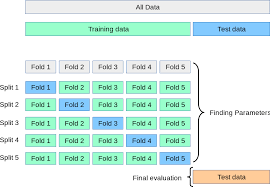



Figura 3: Validação Cruzada - K-fold

## 3.8.1. Estratégia adotada

Na base de treino, será utilizada a técnica de validação cruzada k-fold = 10 para encontrar os melhores hiperparâmetros para os algoritmos, sendo utilizada uma base de validação para analisar a performance do modelo de acordo com a métrica escolhida.

Após, a base de teste será utilizada nos modelos desenvolvidos para analisar a performance, em uma base de dados nunca vista pelos algoritmos, buscando aquele com melhor capacidade de generalização.

In [796]:
kfold = KFold(n_splits=10, random_state=42, shuffle=True)

## 3.9. Resumo - Pré-processamento

- Identificação de 19 variáveis com algum percentual de missing

- Remoção de 5 variáveis que apresentavam alto percentual de missing

- Exclusão de variáveis categóricas com alto desbalanceamento entre as categorias

- Separou-se as variáveis explicativas da variável target, e após, dividiu o dataset em treino (70%) e teste (30%)

- Para as variáveis numéricas com missing, foi utilizado um tratamento de preenchimento do dado faltante com o algoritmo KNN
 
- Para as variáveis categóricas com missing, utilizou-se 2 estratégias: 

        - Estratégia: De acordo com a descrição do dataset, as variáveis com valores de missing representan a ausência da variável e não um problema de preenchimento, para essa situação será imputado com a categoria "Nenhum"

- Pré-processamento específico para as variáveis categóricas utilizando o método get_dummies
 
- Pré-processamento específico para as variáveis numéricas utilizando o método de padronização 

- Preparação do objeto para validação cruzada com K= 10 folds

## 4. Modelagem:  Algoritmos de machine learning (Aprendizado de Máquina)

O termo “machine learning” (do inglês, aprendizado de máquina) foi criado por Arthur Samuel em 1959, como sendo a área de estudo que dá aos computadores a habilidade de aprender sem ser explicitamente programado, e trata-se de uma subcategoria da inteligência artificial.

De acordo com os autores Han et al. (2011), “machine learning” é a área de pesquisa que utiliza “programas de computador que automaticamente aprendem a reconhecer padrões complexos e a tomar decisões inteligentes com base em dados”.

Na figura 7, são apresentados as principais técnicas de machine learning.
    

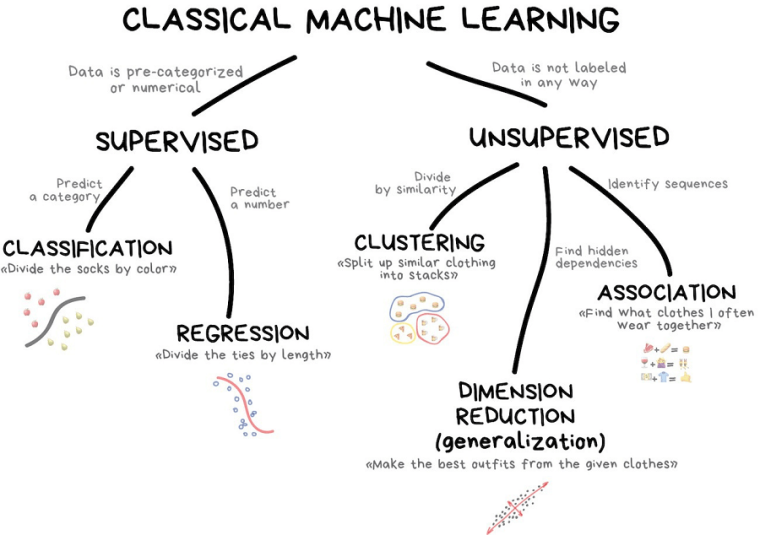

Figura 4: Ténicas de Machine Learning

## 4.1.1  Árvore de Decisão ##

A Árvore de Decisão é um método de aprendizado supervisionado não paramétrico usado para classificação e regressão. O objetivo é criar um modelo que preveja o valor de uma variável de destino aprendendo regras de decisão simples inferidas a partir dos recursos de dados.

As árvores de decisão aprendem com os dados para aproximar uma curva senoidal com um conjunto de regras de decisão if-then-else. Quanto mais profunda a árvore, mais complexas as regras de decisão.

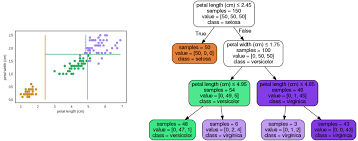

Figura 5: Algoritmo de Árvore de Decisão

## 4.1.2. Random Forest ##

O modelo “Random Forest” foi desenvolvido por Breiman (1996). Esse modelo é composto por um conjunto de árvores de decisão que podem ser de classificação (variável resposta do tipo categórica) ou regressão (variável resposta do tipo numérica) e trata-se de um algoritmo “ensemble bagging de machine learning”. A aplicação desta técnica consiste na criação de muitas árvores de decisão formadas de várias amostras extraídas dos dados originais, tanto de observações quanto de variáveis preditoras. Cada subamostra é criada com reposição, ou seja, uma mesma observação pode ser repetida numa subamostra. Este procedimento é repetido até criar o número de árvores de decisão definidas a priori, formando uma floresta, nome que explica muito bem o funcionamento do algoritmo.
A agregação das previsões das árvores de decisão apresenta um desempenho melhor do que as árvores de decisão individuais. Esse algoritmo fornece a importância de cada variável nos resultados da classificação, ou seja, além da predição, também fornece informações sobre determinantes da separação entre grupos.

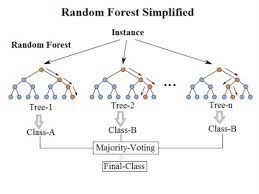

Figura 6: Algoritmo Random Forest

## 4.1.3. XGBoost ##

O Extreme Gradient Boosting (XGBoosting), é um método de aprendizagem de máquina recente usado para problemas de aprendizado supervisionado do tipo “boosting”, baseado em árvore de decisão criado por Tianqi Chen e Carlos Guestrin (2016), o qual é considerado uma melhoria do algoritmo “gradient boosting” (Friedman, 2001).
O XGBoosting implementa a técnica de boosting, que diz respeito a qualquer método de ensemble que pode combinar diversos aprendizes fracos em um mais forte, que funciona de forma sequencial, ou seja, o algoritmo baseia-se na utilização de 𝑛 observações da base de dados para criação de T árvores que  possam minimizar uma função objetivo, que será ajustada por parâmetros ∅, composta por uma função perda 𝑙 – que irá medir a diferença entre os valores observados e preditos, além de ter  um termo de regularização Ω – que é utilizado para evitar o sobreajuste do modelo aos dados (CHEN e GUESTRIN, 2016).

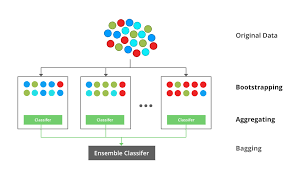

Figura 7: Algoritmo XGboost

## 4.2. Treinamento dos modelos de aprendizado de máquina

Em um problema de aprendizagen de máquina do tipo supervisionada para uma tarefa de regressão, utiliza-se dados de entrada (preditores) já observados para prever uma resposta, e procura-se estimar um valor numérico.

As funções mais utilizadas para avaliar o desempenho de modelos de regressão serão destacados a seguir.

## 4.2.1. Erro Médio Absoluto (MAE)

- O erro médio absoluto (MAE — do inglês Mean Absoluto Error) é a média da diferença entre o valor real com o predito
 
- Entretanto por haver valores positivos e negativos, adiciona-se um módulo entre a diferença dos valores
     


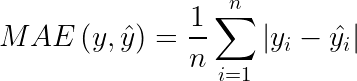

## 4.2.2. Erro Percentual Absoluto Médio (MAPE)

O erro percentual absoluto médio (MAPE — do inglês Mean Absolute Percentual Error) é uma métrica que apresenta a porcentagem de erro em relação aos valores reais

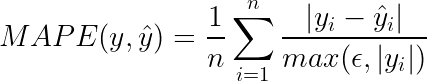

## 4.2.3. Erro Quadrático Médio (MSE)

O erro quadrático médio (MSE — do inglês Mean Squared Error) é uma métrica que calcula a média da diferença entre o valor predito com o real, como a métrica MAE. Entretanto, ao invés de usar o módulo do resultado entre o valor de y e ŷ, nesta métrica a diferença é elevada ao quadrado. Desta maneira penalizando valores que sejam muito diferentes entre o previsto e o real. Portanto, quanto maior é o valor de MSE, significa que o modelo não performou bem em relação as previsões.

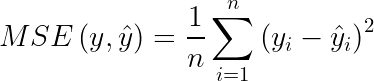

## 4.2.4. Raiz do Erro Quadrático Médio (RMSE)

A raiz do erro quadrático médio (RMSE — do inglês, Root Mean Squared Error) é basicamente o mesmo cálculo de MSE, contendo ainda a mesma ideia de penalização entre diferenças grandes do valor previsto e o real. Porém, para lidar com o problema da diferença entre unidades, é aplicada a raiz quadrática. Assim a unidade fica na mesma escala que o dado original, resultando em uma melhor interpretabilidade do resultado da métrica.

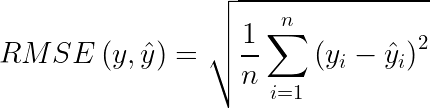

## 4.2.5. Otimização com GridSearch

Uso da métrica RMSE na etapa de otimização de hiperparâmetro com GridSearch

## 4.2.1. Treino do Modelo 02:  Árvore de Decisão ##

In [894]:
# Os hiperparâmetros "fixos" para instanciar o objeto do modelo

rg1 = DecisionTreeRegressor(random_state=42)


# Criando um dicionário com todos os valores que hiperparâmetros que serão testados na árvore de decisão

params_grid = {
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }


#Usando o gridsearch para testar todos os valores do grid
rg1_gscv = GridSearchCV(rg1,params_grid,
                        cv=kfold,
                        scoring='neg_mean_squared_error',
                        n_jobs=-1,
                        verbose=10)
 
    
# Fit do modelo de árvore de decisão

rg1_gscv.fit(X_train,y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 6, 8], 'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]},
             scoring='neg_mean_squared_error', verbose=10)

In [811]:
# Checando performance dos valores da árvore de decisão
rg1_gscv.best_params_

{'max_depth': 8,
 'max_leaf_nodes': 100,
 'min_samples_leaf': 20,
 'min_samples_split': 10}

In [812]:
# Checando a média do score para performance dos valores da árvore de decisão 
rg1_gscv.best_score_*(-1)
rg1_gscv_scores = np.sqrt(rg1_gscv.best_score_*(-1))
rg1_gscv_scores

41768.3948047797

## 4.2.2.1. Previsão na amostra teste

In [813]:
#Árvore de Decisão
y_pred_dt = rg1_gscv.predict(X_test)

mse_rg1_gscv = mean_squared_error(y_test,y_pred_dt)

rmse_rg1_gscv = np.sqrt(mse_rg1_gscv)
rmse_rg1_gscv

49754.87643173082

### Análise e Insights

- Os melhores hiperparâmetros para o modelo de árvore de decisão foram: {'max_depth': 8,'max_leaf_nodes': 100,'min_samples_leaf': 20,'min_samples_split': 10}
 
- Em média, o modelo 01 está cometendo um erro de U$ 41,768.39 em relação aos valores reais. 


- Na base de teste, o modelo de árvore de decisão apresentou piora para a métrica RMSE (U$ 49.754)

- Os valores dos imóveis na região varia entre 34,900 e 755,000 mil dóllares, portanto, um erro de U$ 49.754 não é muito satisfatório, logo serão testados outros algoritmos com o objetivo de melhorar essa métrica

## 4.2.2. Treino do Modelo 03:  Random Forest ##

In [ ]:
# Os hiperparâmetros "fixos" para instanciar o objeto do modelo

rg2 =RandomForestRegressor(random_state=42)


# Criando um dicionário com todos os valores que hiperparâmetros que serão testados na random forest

params_grid = {
    'n_estimators': [200, 300, 500,700],
    'max_features': [2,3,4,5,6,7,8],
    'max_depth' : [2,3,4,5,6]
}




rg2_gscv = GridSearchCV(rg2,params_grid,
                        cv=kfold,
                       scoring='neg_mean_squared_error',
                        n_jobs=-1,
                        verbose=10)
 
    
# Fit do modelo de Random Forest

rg2_gscv.fit(X_train,y_train)

Fitting 10 folds for each of 140 candidates, totalling 1400 fits


In [818]:
# Checando performance dos valores da random forest
rg2_gscv.best_params_

{'max_depth': 6, 'max_features': 8, 'n_estimators': 200}

In [819]:
# Checando a média do score para performance dos valores da random forest
rg2_gscv.best_score_*(-1)
rg2_gscv_scores = np.sqrt(rg2_gscv.best_score_*(-1))
rg2_gscv_scores

37664.268521077945

## 4.2.3.1. Previsão na amostra teste

In [820]:
#Random Forest
y_pred_rf = clf2_gscv.predict(X_test)

mse_rg2_gscv = mean_squared_error(y_test,y_pred_rf)

rmse_rg2_gscv = np.sqrt(mse_rg2_gscv)
rmse_rg2_gscv

44238.70885777629

### Análise e Insights

- Os melhores hiperparâmetros para o modelo de Random Forest foram: {'max_depth': 6, 'max_features': 8, 'n_estimators': 200}
 
 
- A média da métrica RMSE entre o valor previsto e o do preço de venda observado na etapa de validação cruzada com K-fold = 10 foi  U$ 37,664.268


- O modelo 2 apresentou menor erro em relação ao modelo 01 (Árvore de decisão). 


- Na base de teste, o modelo de random forest manteve o resultado para a métrica RMSE (U$ 44,238.71) melhor em relação ao modelo 01


- Na busca de melhorar esse resultado, será utilizado o algoritmo de XGBoost

## 4.2.3. Treino do Modelo 04:  XGboost ##

In [ ]:
# Os hiperparâmetros "fixos" para instanciar o objeto do modelo

rg3 =XGBRegressor(random_state=42)
                        

# Criando um dicionário com todos os valores que hiperparâmetros que serão testados na random forest

params_grid = {
        'learning_rate': [.03, 0.05, .07], 
        'n_estimators': [500,750],
        'min_child_weight': [1,2,3],
        'gamma': [2, 5,6,8],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'max_depth': [6,7,8] 
}

      
                

rg3_gscv = GridSearchCV(rg3,params_grid,
                        cv=kfold,
                        scoring='neg_mean_squared_error',
                        n_jobs=-1,
                        verbose=10)
 
    
# Fit do modelo de Random Forest

rg3_gscv.fit(X_train,y_train)

In [823]:
# Checando performance dos valores do XGboost
rg3_gscv.best_params_

{'colsample_bytree': 0.8,
 'gamma': 2,
 'learning_rate': 0.03,
 'max_depth': 6,
 'min_child_weight': 3,
 'n_estimators': 750,
 'subsample': 0.6}

In [824]:
# Checando a média do score para performance dos valores do XGboost
rg3_gscv.best_score_*(-1)
rg3_gscv_scores = np.sqrt(rg3_gscv.best_score_*(-1))
rg3_gscv_scores

27156.941471479546

## 4.2.3.1. Previsão na amostra teste

In [825]:
#XGboost
y_pred_xg = rg3_gscv.predict(X_test)

mse_rg3_gscv = mean_squared_error(y_test,y_pred_xg)

rmse_rg3_gscv = np.sqrt(mse_rg3_gscv)

rmse_rg3_gscv

46219.863459330845

### Análise e Insights

- Os melhores hiperparâmetros para o modelo de XGboost foram:{'colsample_bytree': 0.8,'gamma': 2,'learning_rate': 0.03,'max_depth': 6,'min_child_weight': 3,'n_estimators': 750,'subsample': 0.6}
 
  
- A média da métrica RMSE entre o valor previsto e o do preço de venda observado na etapa de validação cruzada com K-fold = 10 foi  U$ 27,156.94


- O Modelo piorou consideravelmente seu desempenho em uma base nova: Métrica RMSE de 46219.86

## 5. Resumo - Avaliação

### Análise e Insights:


 - Os três modelos implementados não apresentaram excelentes resultados, mas entre os três, o modelo de Random Forest apresentou melhor capacidade de generalização em uma base de dados nova para a métrica RMSE.


## 5.1. Salvar o modelo com melhor performance

In [826]:
with open('regression_model_dt.pkl', 'wb') as fid:
    cPickle.dump(rg2_gscv, fid)

## 6. Implementação

Para a última etapa do CRISP-DM, predizer os valores das casas na base teste com o modelo de XGBoost para ser submetido na plataforma Kaggle

## 6.1.Carregar o modelo 

In [827]:
#Carregando o modelo XGboost para predição em outra base de dados

regression_model = joblib.load('regression_model_dt.pkl')


## 6.2.Pré-processamento da base de teste

In [879]:
#selecionar somente as variáveis finais

test_data = test_data[["LotFrontage",
"LotArea",
"OverallQual",
"OverallCond",
"YearBuilt",
"YearRemodAdd",
"MasVnrArea",
"BsmtFinSF1",
"BsmtFinSF2",
"BsmtUnfSF",
"TotalBsmtSF",
"2ndFlrSF",
"LowQualFinSF",
"BsmtHalfBath",
"BedroomAbvGr",
"KitchenAbvGr",
"Fireplaces",
"WoodDeckSF",
"OpenPorchSF",
"EnclosedPorch",
"3SsnPorch",
"ScreenPorch",
"PoolArea",
"MiscVal",
"MoSold",
"YrSold",
"GarageType",
"BsmtExposure",
"Fence",
"MasVnrType",
"HouseStyle",
"MSZoning",
"Street",
"GarageFinish",
"MSSubClass",
"RoofStyle",
"PavedDrive",
"SaleCondition",
"ExterQual",
"BldgType",
"BsmtFinType2",
"FireplaceQu",
"LandContour",
"BsmtQual",
"BsmtFinType1",
"LandSlope",
"CentralAir",
"Alley",
"LotShape",
"KitchenQual"]]

In [880]:
#De acordo com informações do dataset, é uma variável categórica
test_data['MSSubClass'] = test_data['MSSubClass'].astype(str)

In [881]:
#imputação de dados - variáveis numéricas
imputer = KNNImputer(n_neighbors = 5, weights = 'uniform',metric='nan_euclidean')
test_data[num]= imputer.fit_transform(test_data[num])
test_data[num] = pd.DataFrame(data=test_data[num], columns = test_data[num].columns)

In [882]:
#Estratégia 2.1: Para esse grupo de variáveis de acordo com as descrições do dataset, as observações sem valores preenchidos
#refere-se a ausência do atributo, logo, serão preenchidas com uma nova categoria, "Nenhum"

test_data['Alley'].fillna("Nenhum", inplace=True)
test_data['FireplaceQu'].fillna("Nenhum", inplace=True)
test_data['Fence'].fillna("Nenhum", inplace=True)
test_data['GarageType'].fillna("Nenhum", inplace=True)
test_data['GarageFinish'].fillna("Nenhum", inplace=True)
test_data['MasVnrType'].fillna("Nenhum", inplace=True)

In [883]:
#Estratégia 2.2: BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 e BsmtFinType2 : 
#Para todos esses recursos categóricos relacionados ao porão, NaN significa que não há porão

test_data['BsmtQual'].fillna("Nenhum", inplace=True)
test_data['BsmtExposure'].fillna("Nenhum", inplace=True)
test_data['BsmtFinType1'].fillna("Nenhum", inplace=True)
test_data['BsmtFinType2'].fillna("Nenhum", inplace=True)    


In [860]:
test_data_cat = list(set(test_data)-set(test_data[num]))
test_data_cat

['GarageType',
 'BsmtExposure',
 'Fence',
 'MasVnrType',
 'HouseStyle',
 'MSZoning',
 'Street',
 'GarageFinish',
 'MSSubClass',
 'RoofStyle',
 'PavedDrive',
 'SaleCondition',
 'ExterQual',
 'BldgType',
 'BsmtFinType2',
 'FireplaceQu',
 'LandContour',
 'BsmtQual',
 'BsmtFinType1',
 'LandSlope',
 'CentralAir',
 'Alley',
 'LotShape',
 'KitchenQual']

In [884]:
test_data_dummies=test_data[test_data_cat]
test_data_dummies

,GarageType,BsmtExposure,Fence,MasVnrType,HouseStyle,MSZoning,Street,GarageFinish,MSSubClass,RoofStyle,PavedDrive,SaleCondition,ExterQual,BldgType,BsmtFinType2,FireplaceQu,LandContour,BsmtQual,BsmtFinType1,LandSlope,CentralAir,Alley,LotShape,KitchenQual
Id,,,,,,,,,,,,,,,,,,,,,,,,
1461,Attchd,No,MnPrv,None,1Story,RH,Pave,Unf,20,Gable,Y,Normal,TA,1Fam,LwQ,Nenhum,Lvl,TA,Rec,Gtl,Y,Nenhum,Reg,TA
1462,Attchd,No,Nenhum,BrkFace,1Story,RL,Pave,Unf,20,Hip,Y,Normal,TA,1Fam,Unf,Nenhum,Lvl,TA,ALQ,Gtl,Y,Nenhum,IR1,Gd
1463,Attchd,No,MnPrv,None,2Story,RL,Pave,Fin,60,Gable,Y,Normal,TA,1Fam,Unf,TA,Lvl,Gd,GLQ,Gtl,Y,Nenhum,IR1,TA
1464,Attchd,No,Nenhum,BrkFace,2Story,RL,Pave,Fin,60,Gable,Y,Normal,TA,1Fam,Unf,Gd,Lvl,TA,GLQ,Gtl,Y,Nenhum,IR1,Gd
1465,Attchd,No,Nenhum,None,1Story,RL,Pave,RFn,120,Gable,Y,Normal,Gd,TwnhsE,Unf,Nenhum,HLS,Gd,ALQ,Gtl,Y,Nenhum,IR1,Gd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,Nenhum,No,Nenhum,None,2Story,RM,Pave,Nenhum,160,Gable,Y,Normal,TA,Twnhs,Unf,Nenhum,Lvl,TA,Unf,Gtl,Y,Nenhum,Reg,TA
2916,CarPort,No,Nenhum,None,2Story,RM,Pave,Unf,160,Gable,Y,Abnorml,TA,TwnhsE,Unf,Nenhum,Lvl,TA,Rec,Gtl,Y,Nenhum,Reg,TA
2917,Detchd,No,Nenhum,None,1Story,RL,Pave,Unf,20,Gable,Y,Abnorml,TA,1Fam,Unf,TA,Lvl,TA,ALQ,Gtl,Y,Nenhum,Reg,TA


In [885]:
test_data_final = pd.get_dummies(data = test_data,columns=test_data_cat)
test_data_final

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,BsmtHalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Nenhum,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_Nenhum,BsmtExposure_No,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_Nenhum,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Nenhum,MasVnrType_None,MasVnrType_Stone,HouseStyle_1.5Fin,HouseStyle_1.5Unf,...,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Nenhum,BsmtFinType2_Rec,BsmtFinType2_Unf,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Nenhum,FireplaceQu_Po,FireplaceQu_TA,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Nenhum,BsmtQual_TA,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Nenhum,BsmtFinType1_Rec,BsmtFinType1_Unf,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,CentralAir_N,CentralAir_Y,Alley_Grvl,Alley_Nenhum,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,144.0,270.0,882.0,0.0,0.0,0.0,2.0,1.0,0.0,140.0,0.0,0.0,0.0,120.0,0.0,0.0,6.0,2010.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
1462,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,0.0,406.0,1329.0,0.0,0.0,0.0,3.0,1.0,0.0,393.0,36.0,0.0,0.0,0.0,0.0,12500.0,6.0,2010.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0
1463,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,0.0,137.0,928.0,701.0,0.0,0.0,3.0,1.0,1.0,212.0,34.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1
1464,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,0.0,324.0,926.0,678.0,0.0,0.0,3.0,1.0,1.0,360.0,36.0,0.0,0.0,0.0,0.0,0.0,6.0,2010.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0
1465,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,0.0,1017.0,1280.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,82.0,0.0,0.0,144.0,0.0,0.0,1.0,2010.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,21.0,1936.0,4.0,7.0,1970.0,1970.0,0.0,0.0,0.0,546.0,546.0,546.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2006.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2916,21.0,1894.0,4.0,5.0,1970.0,1970.0,0.0,252.0,0.0,294.0,546.0,546.0,0.0,0.0,3.0,1.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,4.0,2006.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2917,160.0,20000.0,5.0,7.0,1960.0,1996.0,0.0,12

In [886]:
scaler = MinMaxScaler()
test_data_final[num] = scaler.fit_transform(test_data_final[num])
test_data_final[num]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,BsmtHalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,0.329609,0.184147,0.444444,0.625,0.625954,0.183333,0.000000,0.116708,0.094364,0.126168,0.173111,0.000000,0.0,0.0,0.333333,0.5,0.00,0.098315,0.000000,0.0,0.0,0.208333,0.0,0.000000,0.454545,1.0
1462,0.335196,0.232124,0.555556,0.625,0.603053,0.133333,0.083721,0.230175,0.000000,0.189720,0.260844,0.000000,0.0,0.0,0.500000,0.5,0.00,0.275983,0.048518,0.0,0.0,0.000000,0.0,0.735294,0.454545,1.0
1463,0.296089,0.224197,0.444444,0.500,0.900763,0.800000,0.000000,0.197257,0.000000,0.064019,0.182139,0.376477,0.0,0.0,0.500000,0.5,0.25,0.148876,0.045822,0.0,0.0,0.000000,0.0,0.000000,0.181818,1.0
1464,0.318436,0.154326,0.555556,0.625,0.908397,0.800000,0.015504,0.150125,0.000000,0.151402,0.181747,0.364125,0.0,0.0,0.500000,0.5,0.25,0.252809,0.048518,0.0,0.0,0.000000,0.0,0.000000,0.454545,1.0
1465,0.122905,0.064121,0.777778,0.500,0.862595,0.700000,0.000000,0.065586,0.000000,0.475234,0.251227,0.000000,0.0,0.0,0.333333,0.5,0.00,0.000000,0.110512,0.0,0.0,0.250000,0.0,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,0.000000,0.008453,0.333333,0.750,0.694656,0.333333,0.000000,0.000000,0.000000,0.255140,0.107164,0.293233,0.0,0.0,0.500000,0.5,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.454545,0.0
2916,0.000000,0.007691,0.333333,0.500,0.694656,0.333333,0.000000,0.062843,0.000000,0.137383,0.107164,0.293233,0.0,0.0,0.500000,0.5,0.00,0.000000,0.032345,0.0,0.0,0.000000,0.0,0.000000,0.272727,0.0
2917,0.776536,0.336115,0.444444,0.750,0.618321,0.766667,0.000000,0.305237,0.000000,0.000000,0.240236,0.000000,0.0,0.0,0.666667,0.5,0.25,0.332865,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.727273,0.0


In [887]:
test_data_final
test_data= test_data_final.copy()
test_data

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,BsmtHalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Nenhum,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_Nenhum,BsmtExposure_No,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_Nenhum,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Nenhum,MasVnrType_None,MasVnrType_Stone,HouseStyle_1.5Fin,HouseStyle_1.5Unf,...,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Nenhum,BsmtFinType2_Rec,BsmtFinType2_Unf,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Nenhum,FireplaceQu_Po,FireplaceQu_TA,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Nenhum,BsmtQual_TA,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Nenhum,BsmtFinType1_Rec,BsmtFinType1_Unf,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,CentralAir_N,CentralAir_Y,Alley_Grvl,Alley_Nenhum,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,0.329609,0.184147,0.444444,0.625,0.625954,0.183333,0.000000,0.116708,0.094364,0.126168,0.173111,0.000000,0.0,0.0,0.333333,0.5,0.00,0.098315,0.000000,0.0,0.0,0.208333,0.0,0.000000,0.454545,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
1462,0.335196,0.232124,0.555556,0.625,0.603053,0.133333,0.083721,0.230175,0.000000,0.189720,0.260844,0.000000,0.0,0.0,0.500000,0.5,0.00,0.275983,0.048518,0.0,0.0,0.000000,0.0,0.735294,0.454545,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0
1463,0.296089,0.224197,0.444444,0.500,0.900763,0.800000,0.000000,0.197257,0.000000,0.064019,0.182139,0.376477,0.0,0.0,0.500000,0.5,0.25,0.148876,0.045822,0.0,0.0,0.000000,0.0,0.000000,0.181818,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1
1464,0.318436,0.154326,0.555556,0.625,0.908397,0.800000,0.015504,0.150125,0.000000,0.151402,0.181747,0.364125,0.0,0.0,0.500000,0.5,0.25,0.252809,0.048518,0.0,0.0,0.000000,0.0,0.000000,0.454545,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0
1465,0.122905,0.064121,0.777778,0.500,0.862595,0.700000,0.000000,0.065586,0.000000,0.475234,0.251227,0.000000,0.0,0.0,0.333333,0.5,0.00,0.000000,0.110512,0.0,0.0,0.250000,0.0,0.000000,0.000000,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,0.000000,0.008453,0.333333,0.750,0.694656,0.333333,0.000000,0.000000,0.000000,0.255140,0.107164,0.293233,0.0,0.0,0.500000,0.5,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.454545,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0

## 6.3. Realizar previsão na base de teste

In [888]:
test_data['SalePrice']= regression_model.predict(test_data)

C:\Users\jam06\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- MSSubClass_150
Feature names seen at fit time, yet now missing:
- HouseStyle_2.5Fin

  warnings.warn(message, FutureWarning)


In [889]:
test_data['SalePrice'].describe()

count      1459.000000
mean     179544.587125
std       50127.333168
min      107673.787688
25%      142643.546018
50%      162805.341187
75%      204173.358077
max      414481.039015
Name: SalePrice, dtype: float64

## 6.4. Exportar base Teste com as previsões dos valores das casas

In [890]:
test_data = test_data.reset_index(drop=False)
test_data

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,BsmtHalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Nenhum,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_Nenhum,BsmtExposure_No,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_Nenhum,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Nenhum,MasVnrType_None,MasVnrType_Stone,HouseStyle_1.5Fin,...,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Nenhum,BsmtFinType2_Rec,BsmtFinType2_Unf,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Nenhum,FireplaceQu_Po,FireplaceQu_TA,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Nenhum,BsmtQual_TA,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Nenhum,BsmtFinType1_Rec,BsmtFinType1_Unf,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,CentralAir_N,CentralAir_Y,Alley_Grvl,Alley_Nenhum,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SalePrice
0,1461,0.329609,0.184147,0.444444,0.625,0.625954,0.183333,0.000000,0.116708,0.094364,0.126168,0.173111,0.000000,0.0,0.0,0.333333,0.5,0.00,0.098315,0.000000,0.0,0.0,0.208333,0.0,0.000000,0.454545,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,137959.250606
1,1462,0.335196,0.232124,0.555556,0.625,0.603053,0.133333,0.083721,0.230175,0.000000,0.189720,0.260844,0.000000,0.0,0.0,0.500000,0.5,0.00,0.275983,0.048518,0.0,0.0,0.000000,0.0,0.735294,0.454545,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,155539.345685
2,1463,0.296089,0.224197,0.444444,0.500,0.900763,0.800000,0.000000,0.197257,0.000000,0.064019,0.182139,0.376477,0.0,0.0,0.500000,0.5,0.25,0.148876,0.045822,0.0,0.0,0.000000,0.0,0.000000,0.181818,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,179355.663599
3,1464,0.318436,0.154326,0.555556,0.625,0.908397,0.800000,0.015504,0.150125,0.000000,0.151402,0.181747,0.364125,0.0,0.0,0.500000,0.5,0.25,0.252809,0.048518,0.0,0.0,0.000000,0.0,0.000000,0.454545,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,198914.564962
4,1465,0.122905,0.064121,0.777778,0.500,0.862595,0.700000,0.000000,0.065586,0.000000,0.475234,0.251227,0.000000,0.0,0.0,0.333333,0.5,0.00,0.000000,0.110512,0.0,0.0,0.250000,0.0,0.000000,0.000000,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,190838.039773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,0.000000,0.008453,0.333333,0.750,0.694656,0.333333,0.000000,0.000000,0.000000,0.255140,0.107164,0.293233,0.0,0.0,0.500000,0.5,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.454545,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,122907.548974

In [892]:
base_envio=test_data[["Id","SalePrice"]]
base_envio

,Id,SalePrice
0,1461,137959.250606
1,1462,155539.345685
2,1463,179355.663599
3,1464,198914.564962
4,1465,190838.039773
...,...,...
1454,2915,122907.548974
1455,2916,127838.366216
1456,2917,159416.243162
1457,2918,155902.437242


In [893]:
base_envio.to_csv('./base_envio.csv', sep = ';', header = True, decimal='.',index=False)

## 7. Conclusão 

- O projeto desenvolvido seguiu a metodologia CRISP-DM passando por todas as etapas de um projeto de modelo preditivo para uma tarefa supervisionada de regressão


- Foram desenvolvidos três modelos de machine learning, com a Random Forest apresentando um desempenho para a métrica RMSE melhor em relação aos demais modelos (Árvore de decisão e Random Forest) na base de teste

 
- O uso do modelo poderia ser feito juntamente com as estimativas de preços dos especialistas
 

- Sugestão básica de implementação:
 
      - Salvar o modelo treinado da Scikit-learn (por exemplo, usando a joblib), incluindo o pipeline completo de
      pré-processamento e predição, depois fazer o upload desse modelo treinado em um ambiete de produção e usá-lo 
      a fim de realizar predições chamando o método predict()
      
 

## Referências

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html

https://scikit-learn.org/stable/modules/model_evaluation.html